1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Deskewing
7. Removing Borders
8. Missing Borders
9. Transparency / Alpha Channel

## 00: Opening an Image

In [23]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [24]:
import cv2
import numpy
from matplotlib import pyplot as plt
image_file = r"E-receipt-Dataset\scb\IMG_0793.JPG"
img = cv2.imread(image_file)

In [25]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

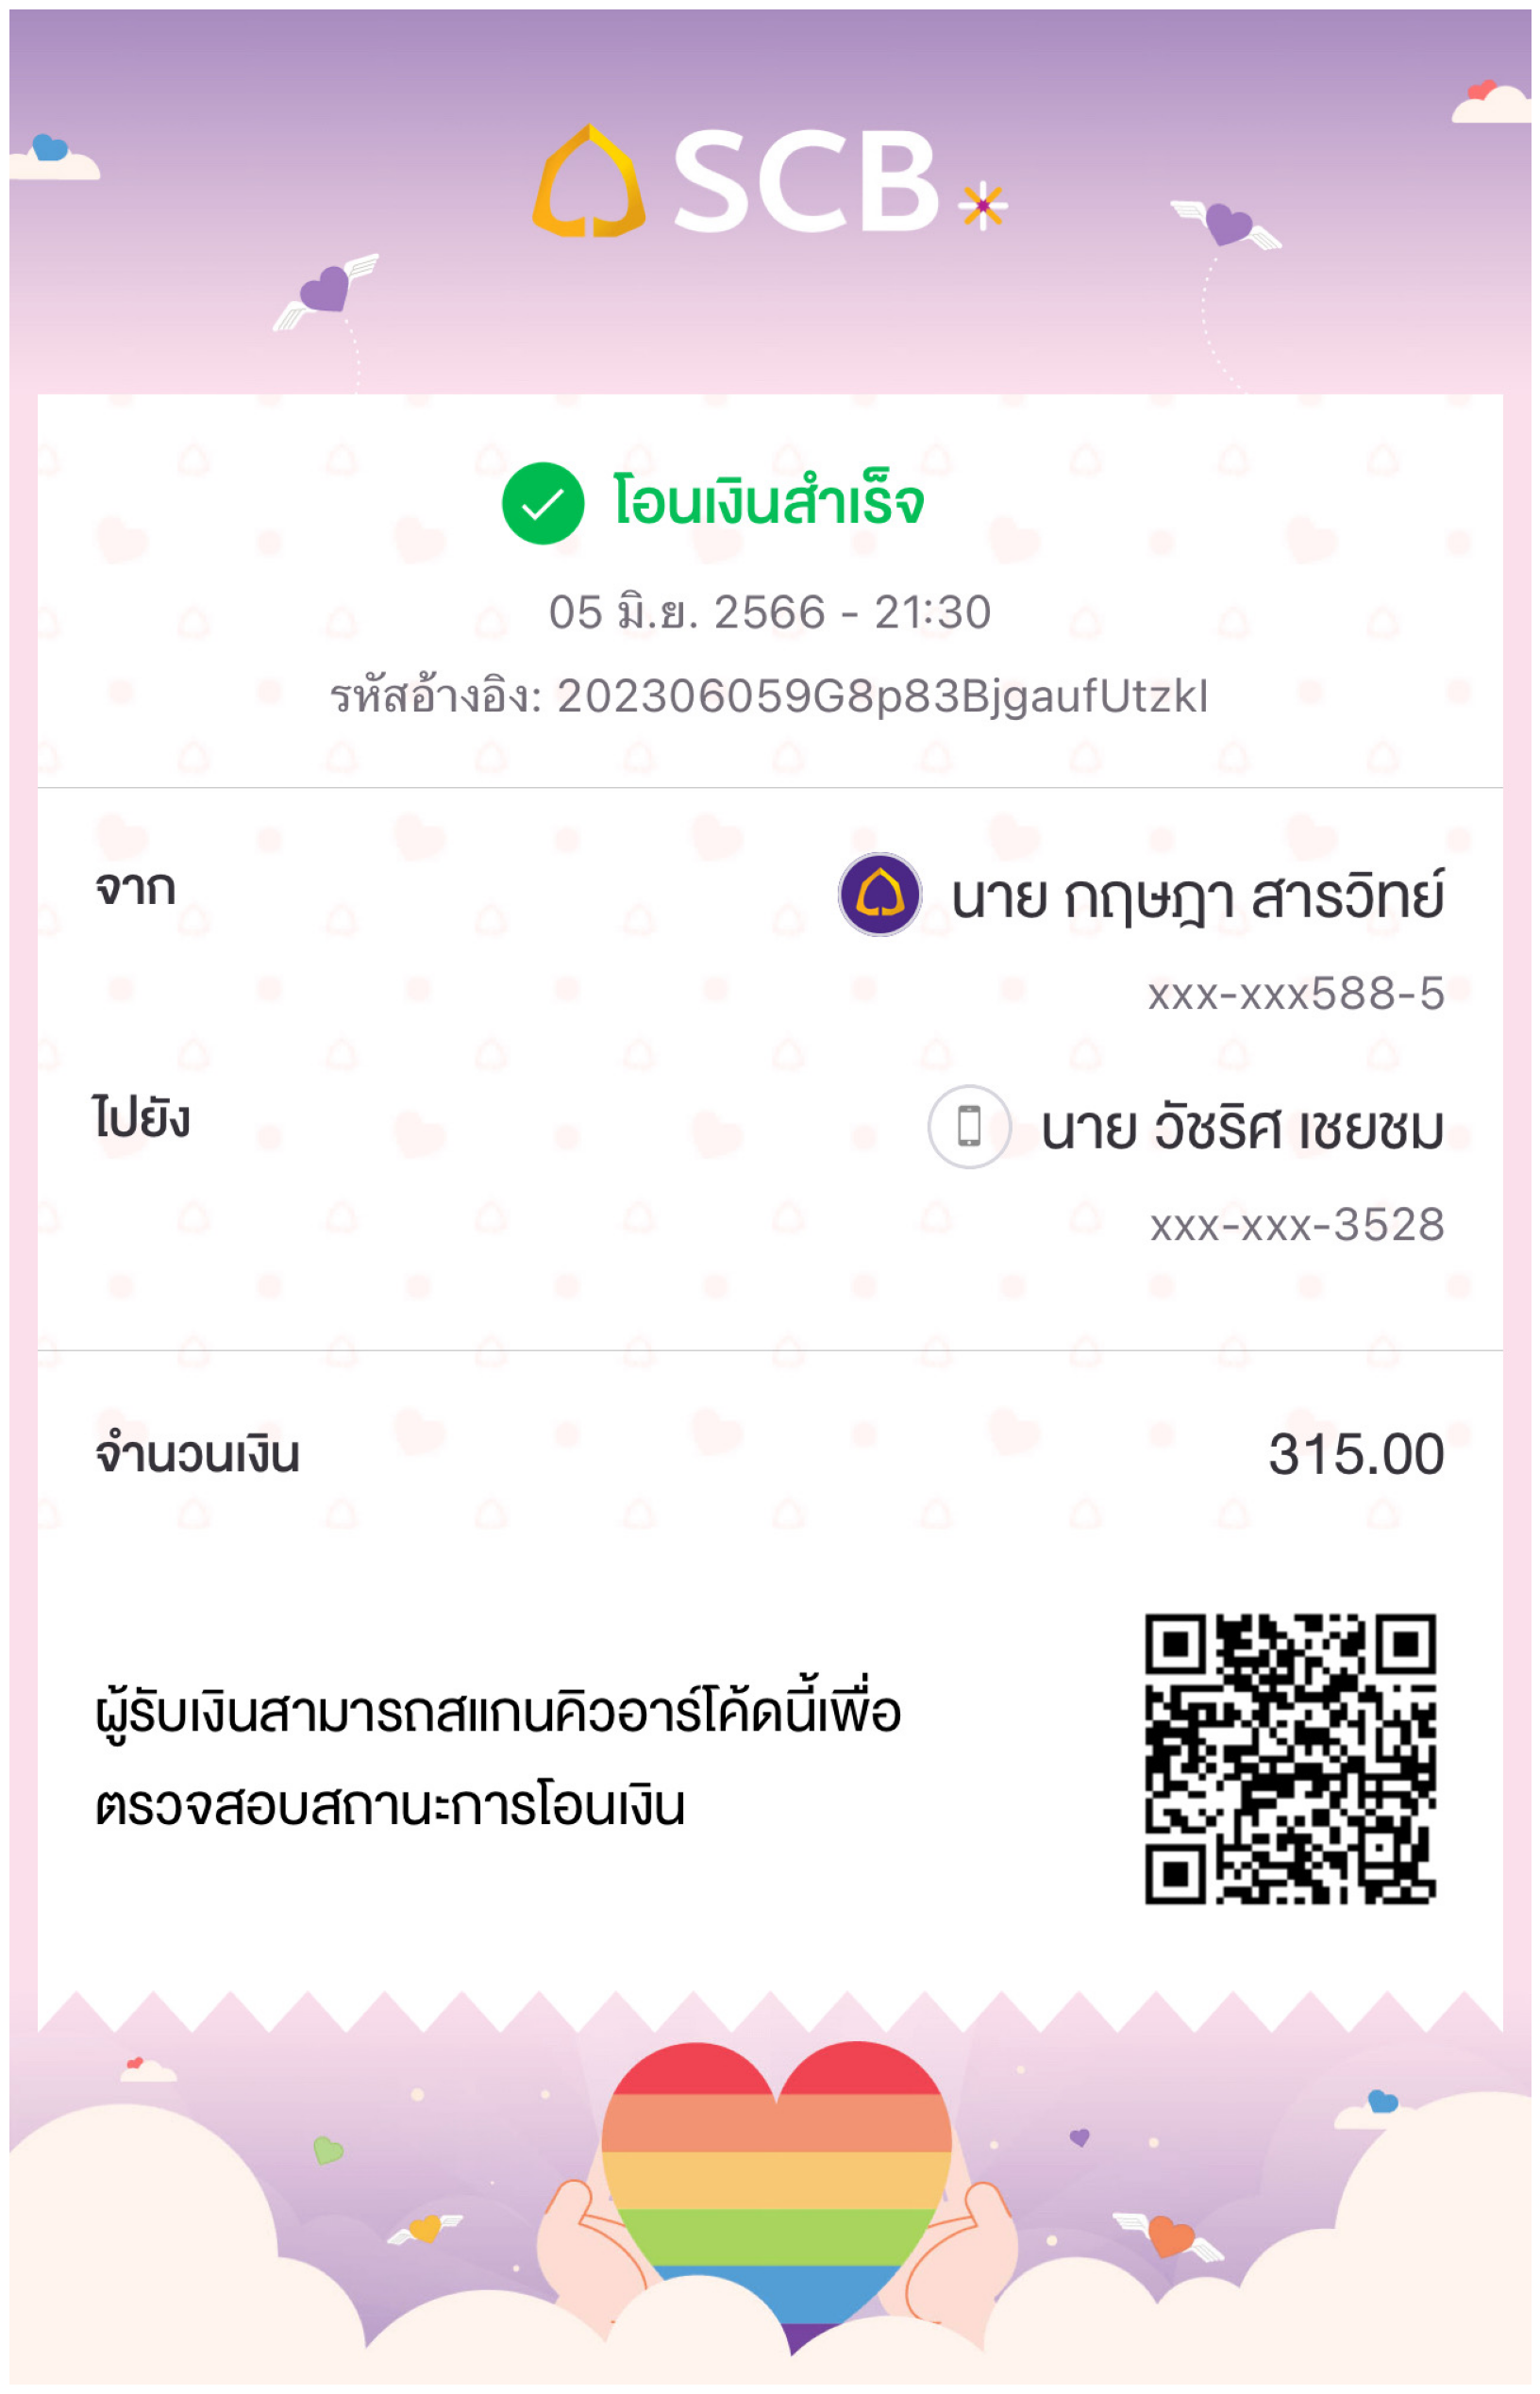

In [26]:
display(image_file)

## 01: Inverted Images

In [27]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

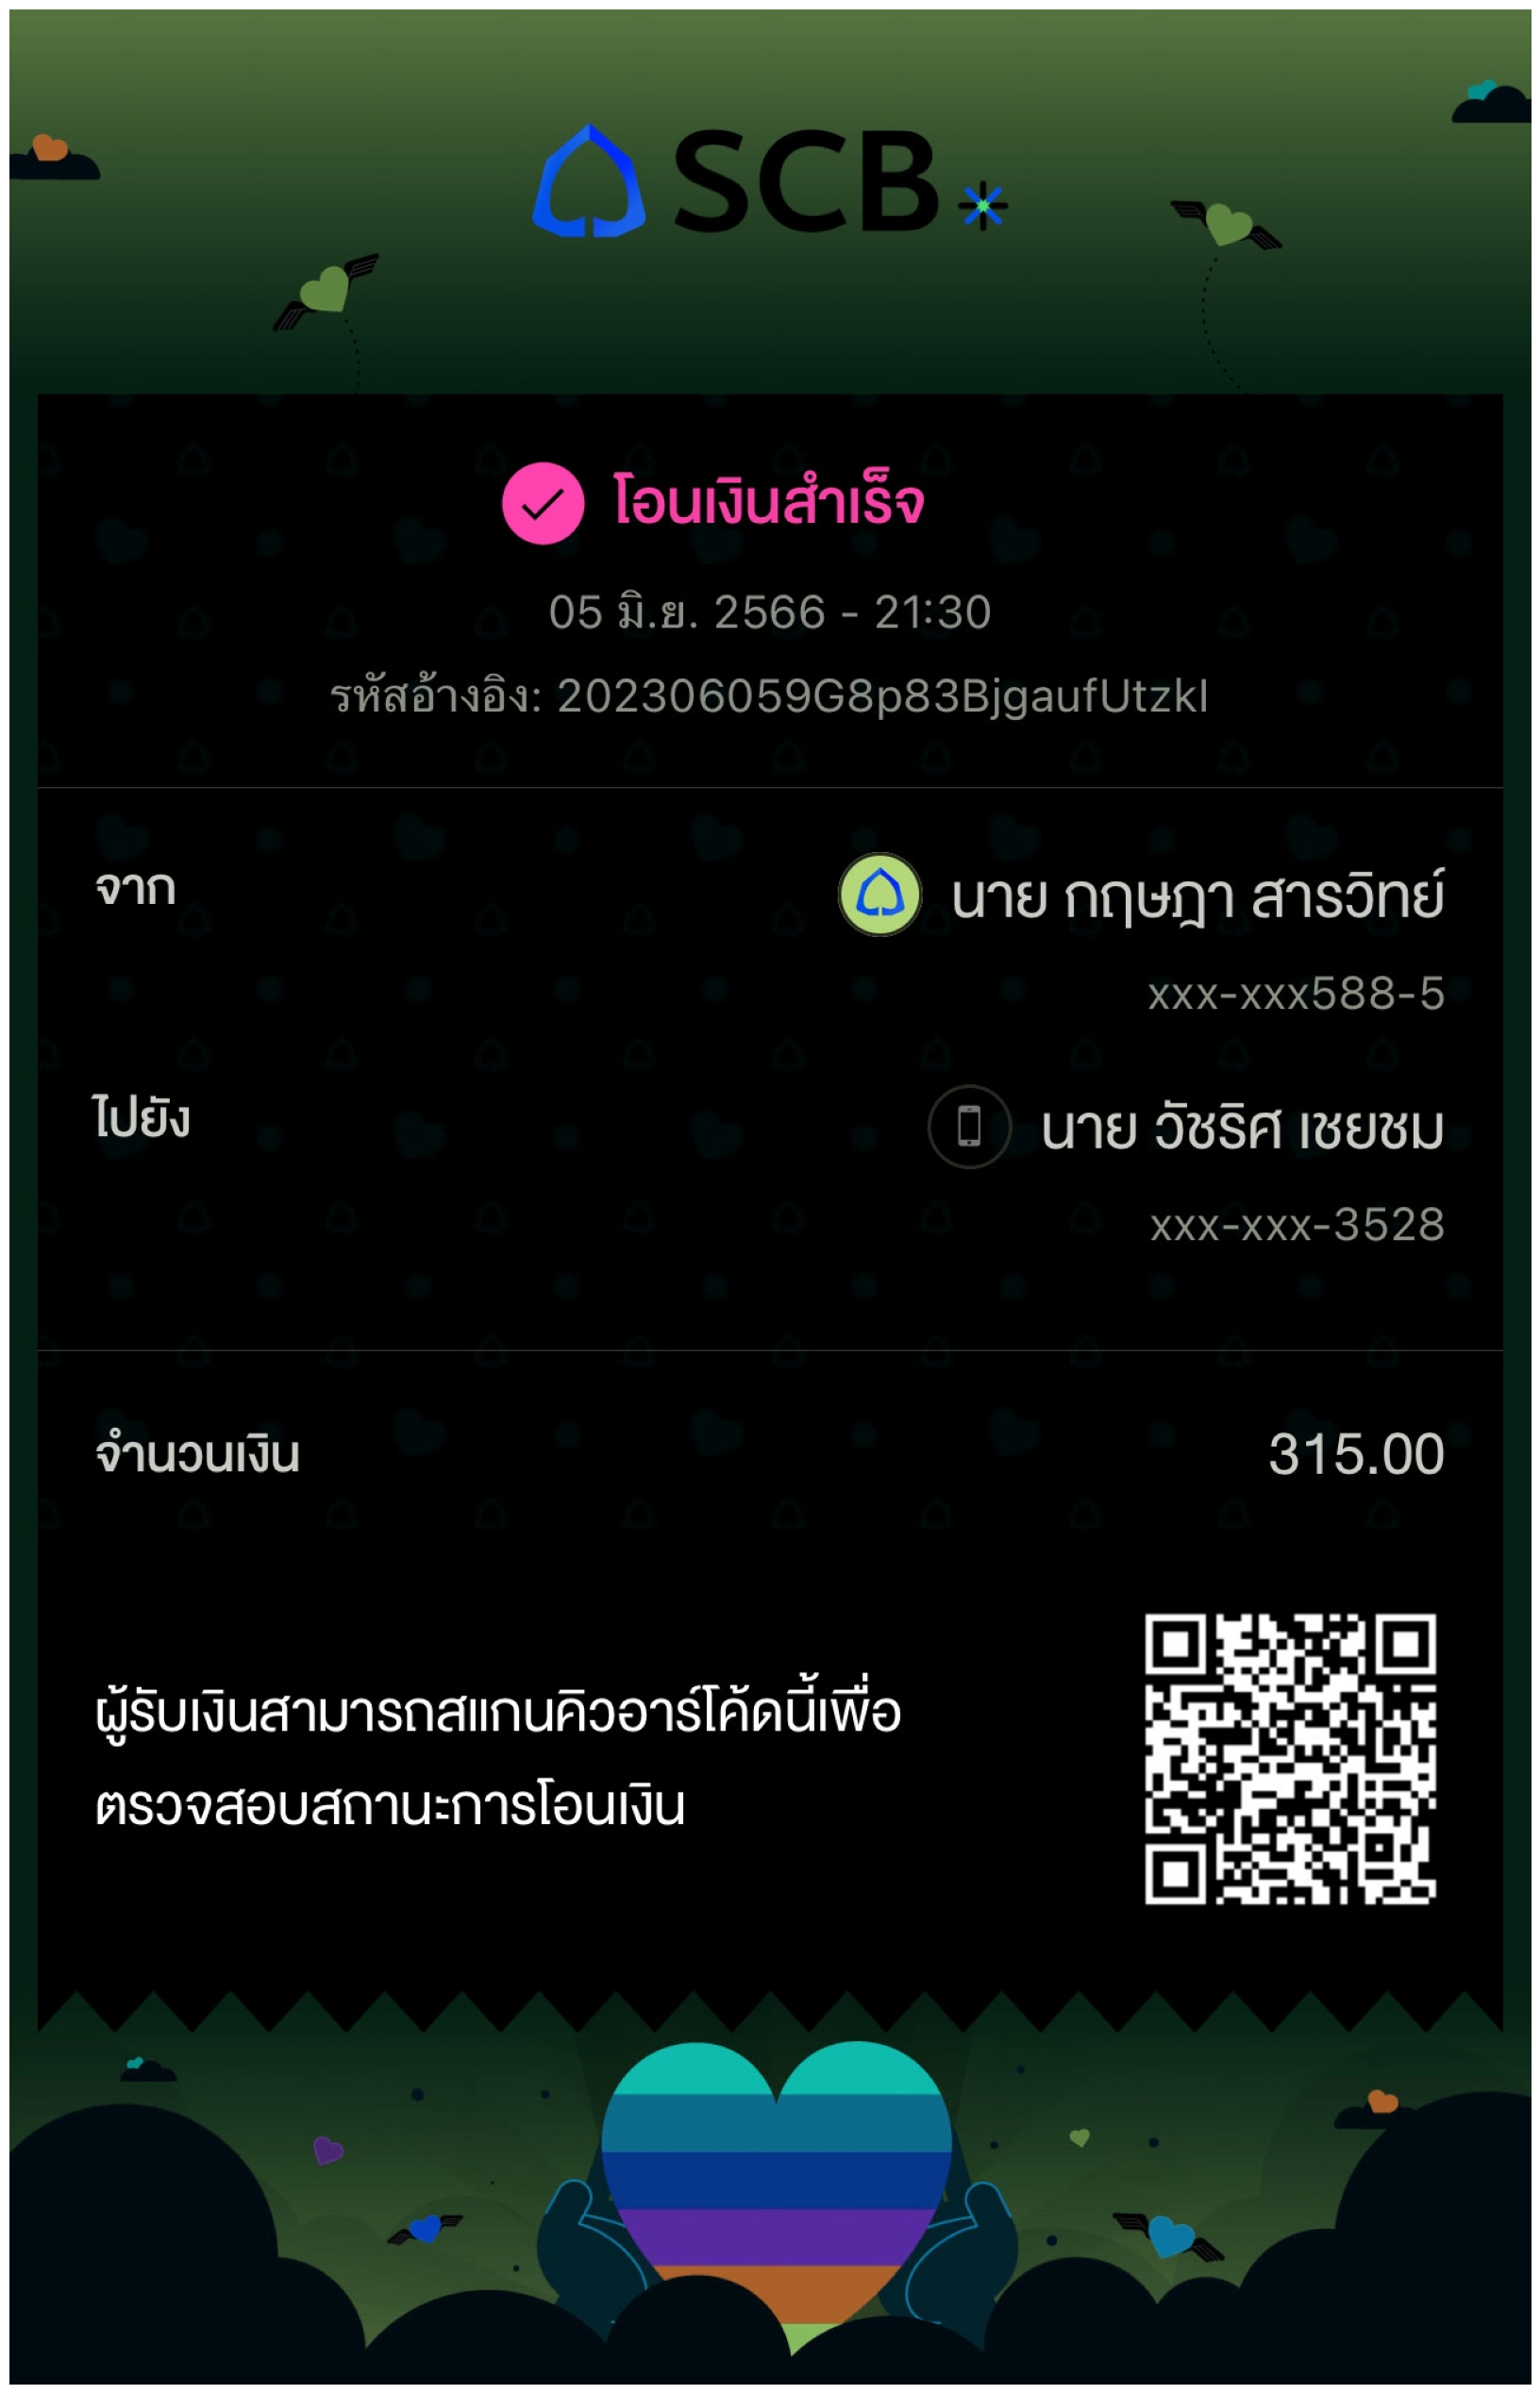

In [28]:
display("temp/inverted.jpg")

## 02: Rescaling

## 03: Binarization

In [29]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [30]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

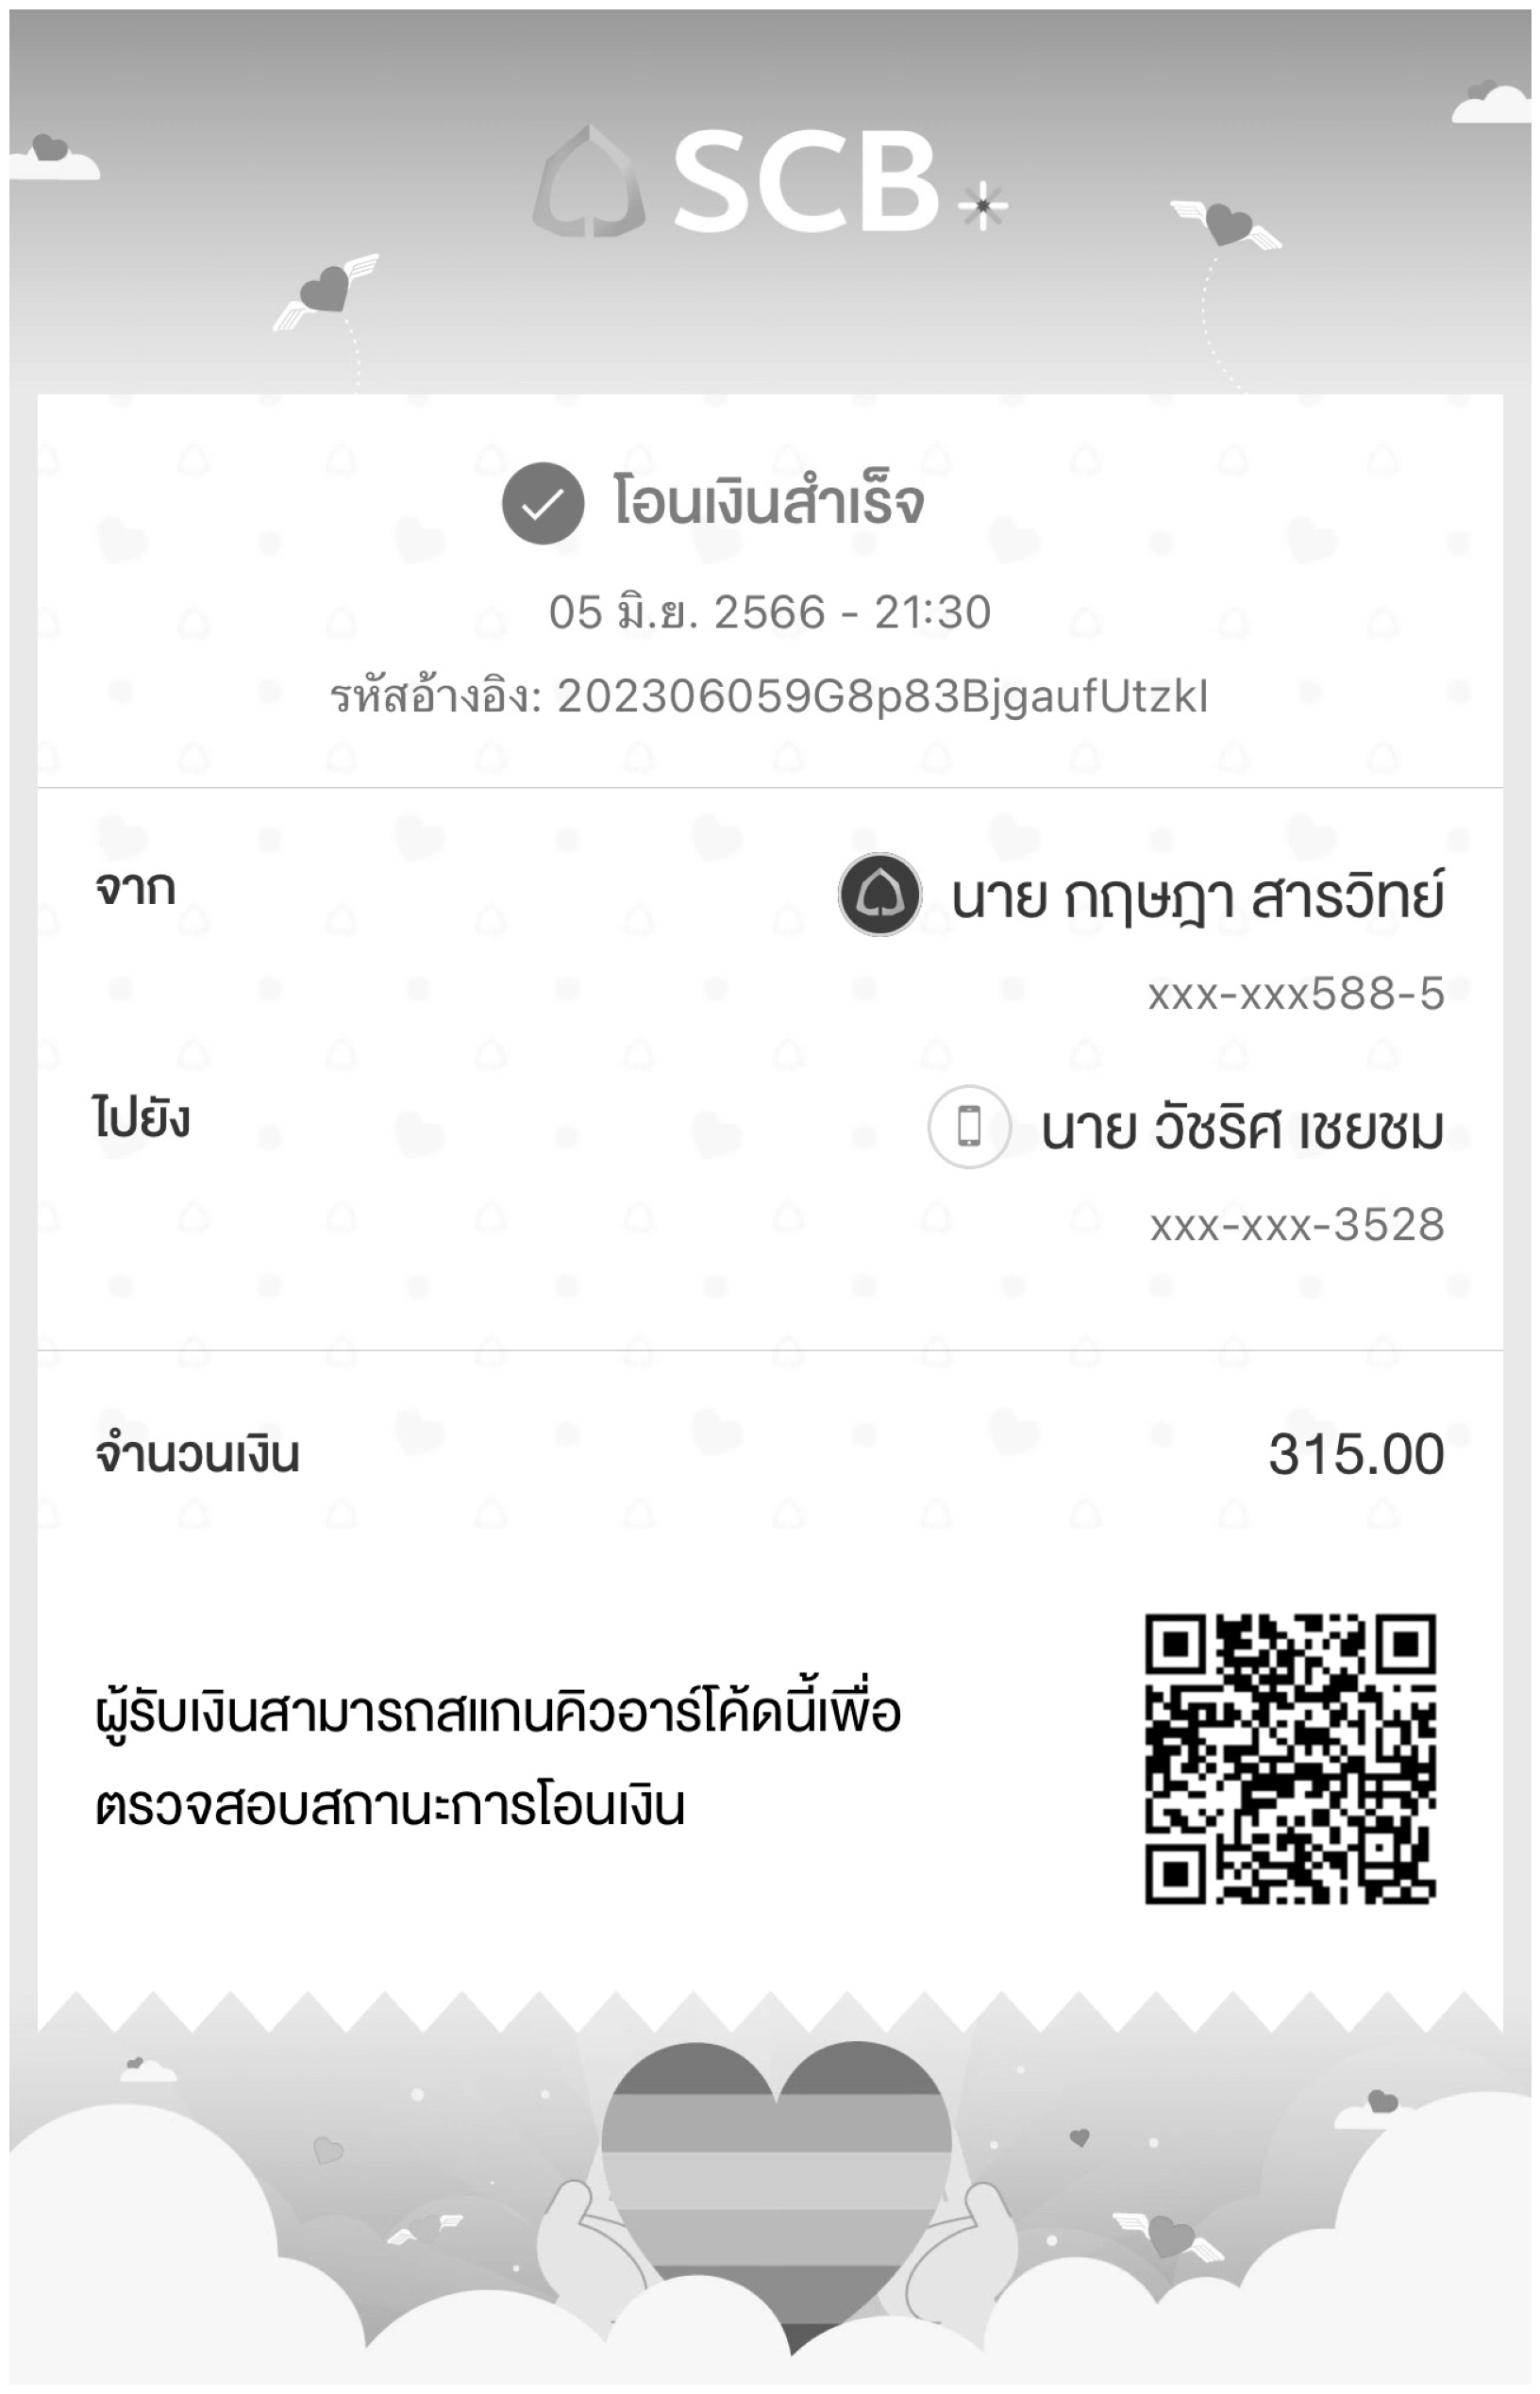

In [31]:
display("temp/gray.jpg")

In [32]:
# thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
thresh, otsu = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite("temp/bw_image.jpg", otsu)

True

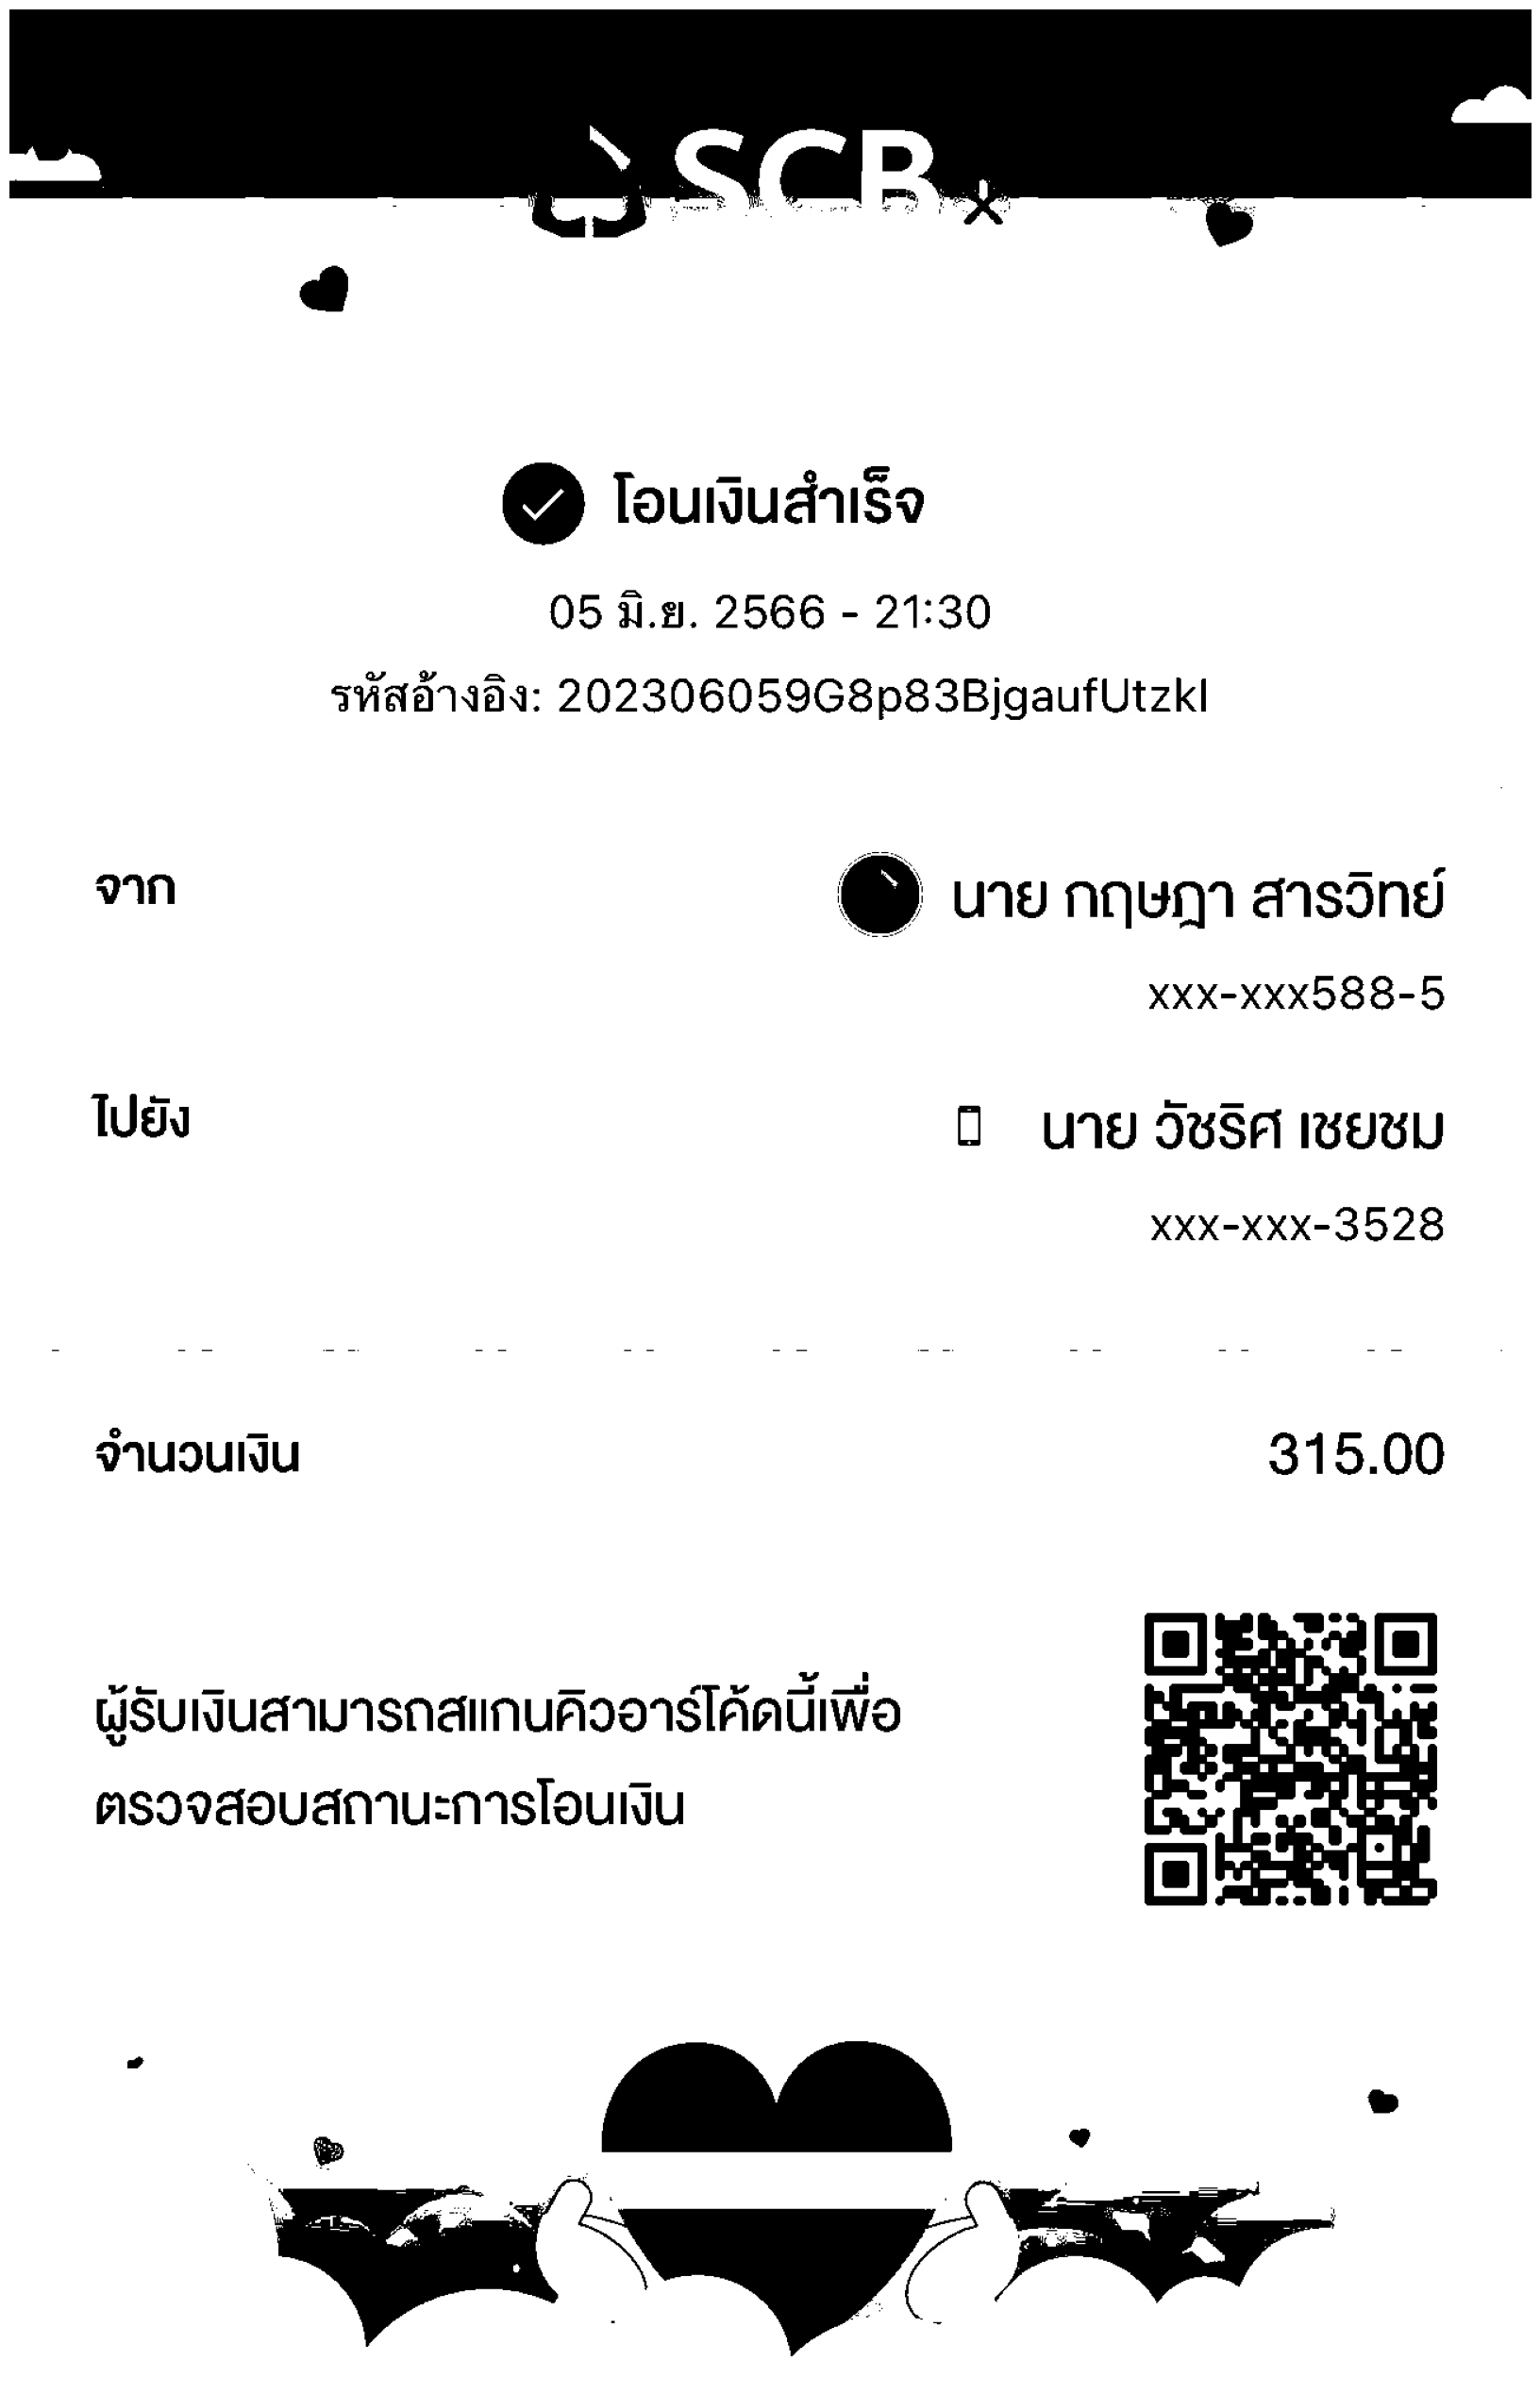

In [33]:
display("temp/bw_image.jpg")

## 04: Noise Removal

In [34]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [35]:
no_noise = noise_removal(otsu)
no_noise = otsu
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

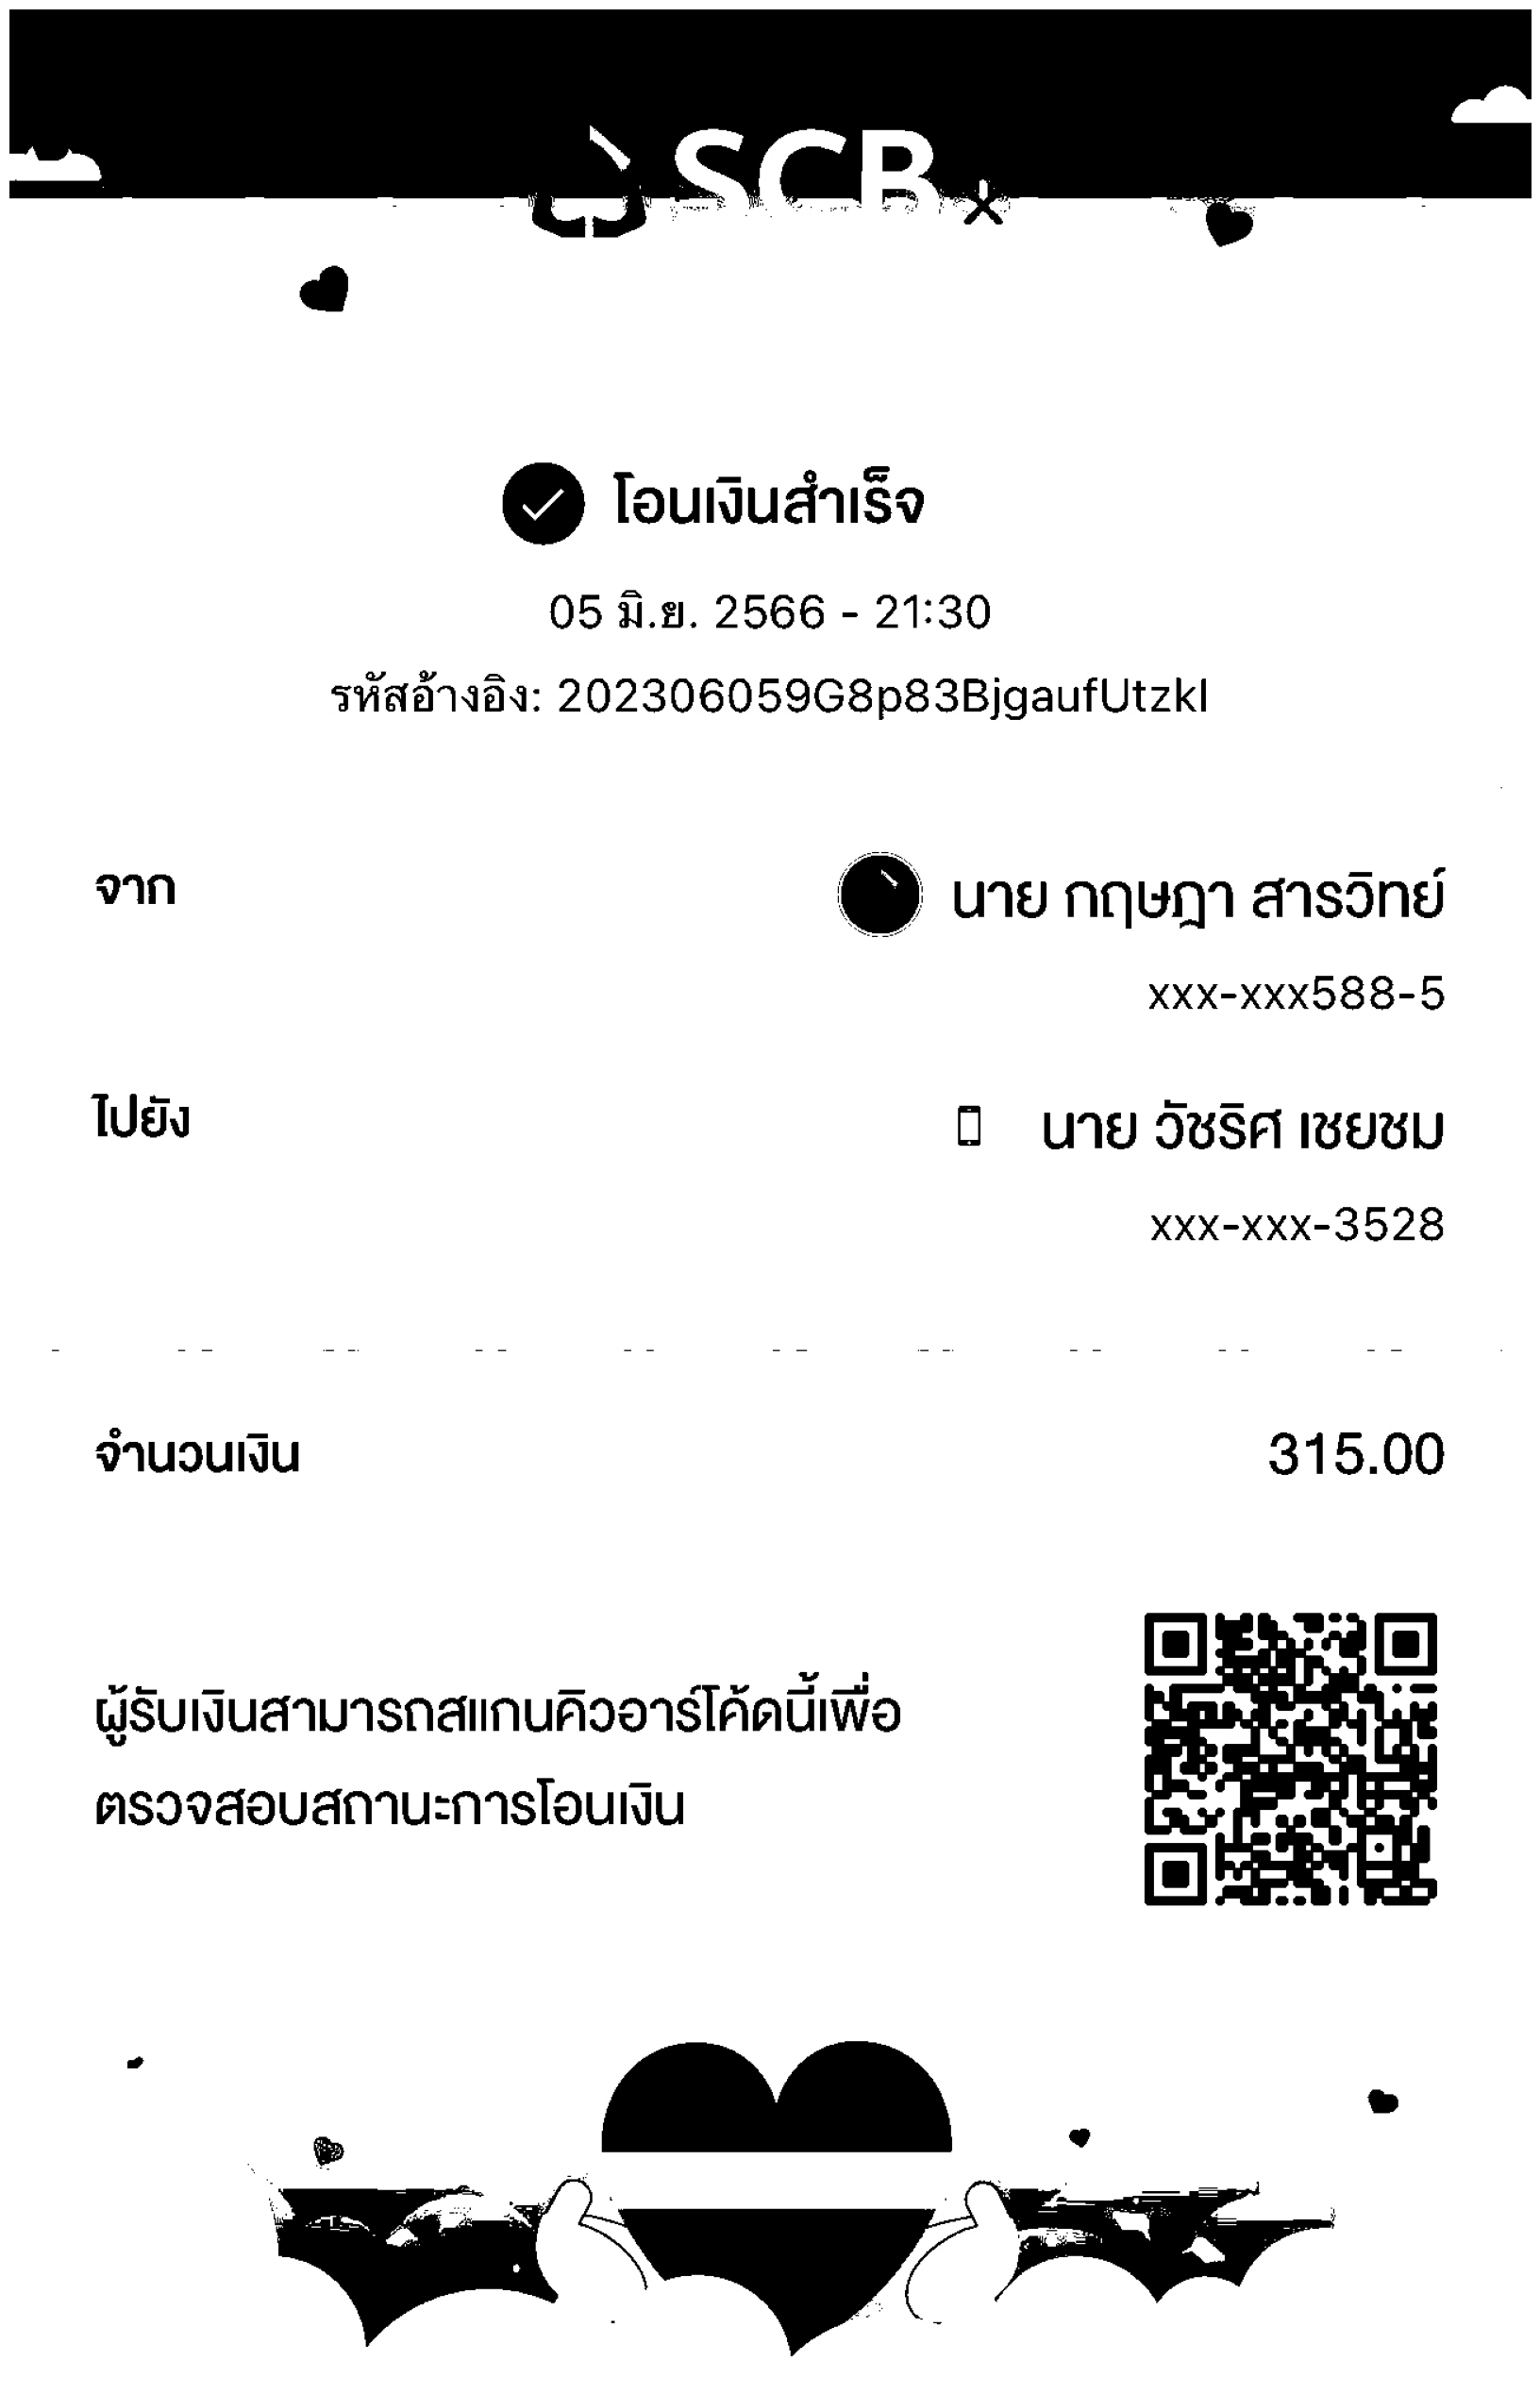

In [36]:
display("temp/no_noise.jpg")

In [37]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [38]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

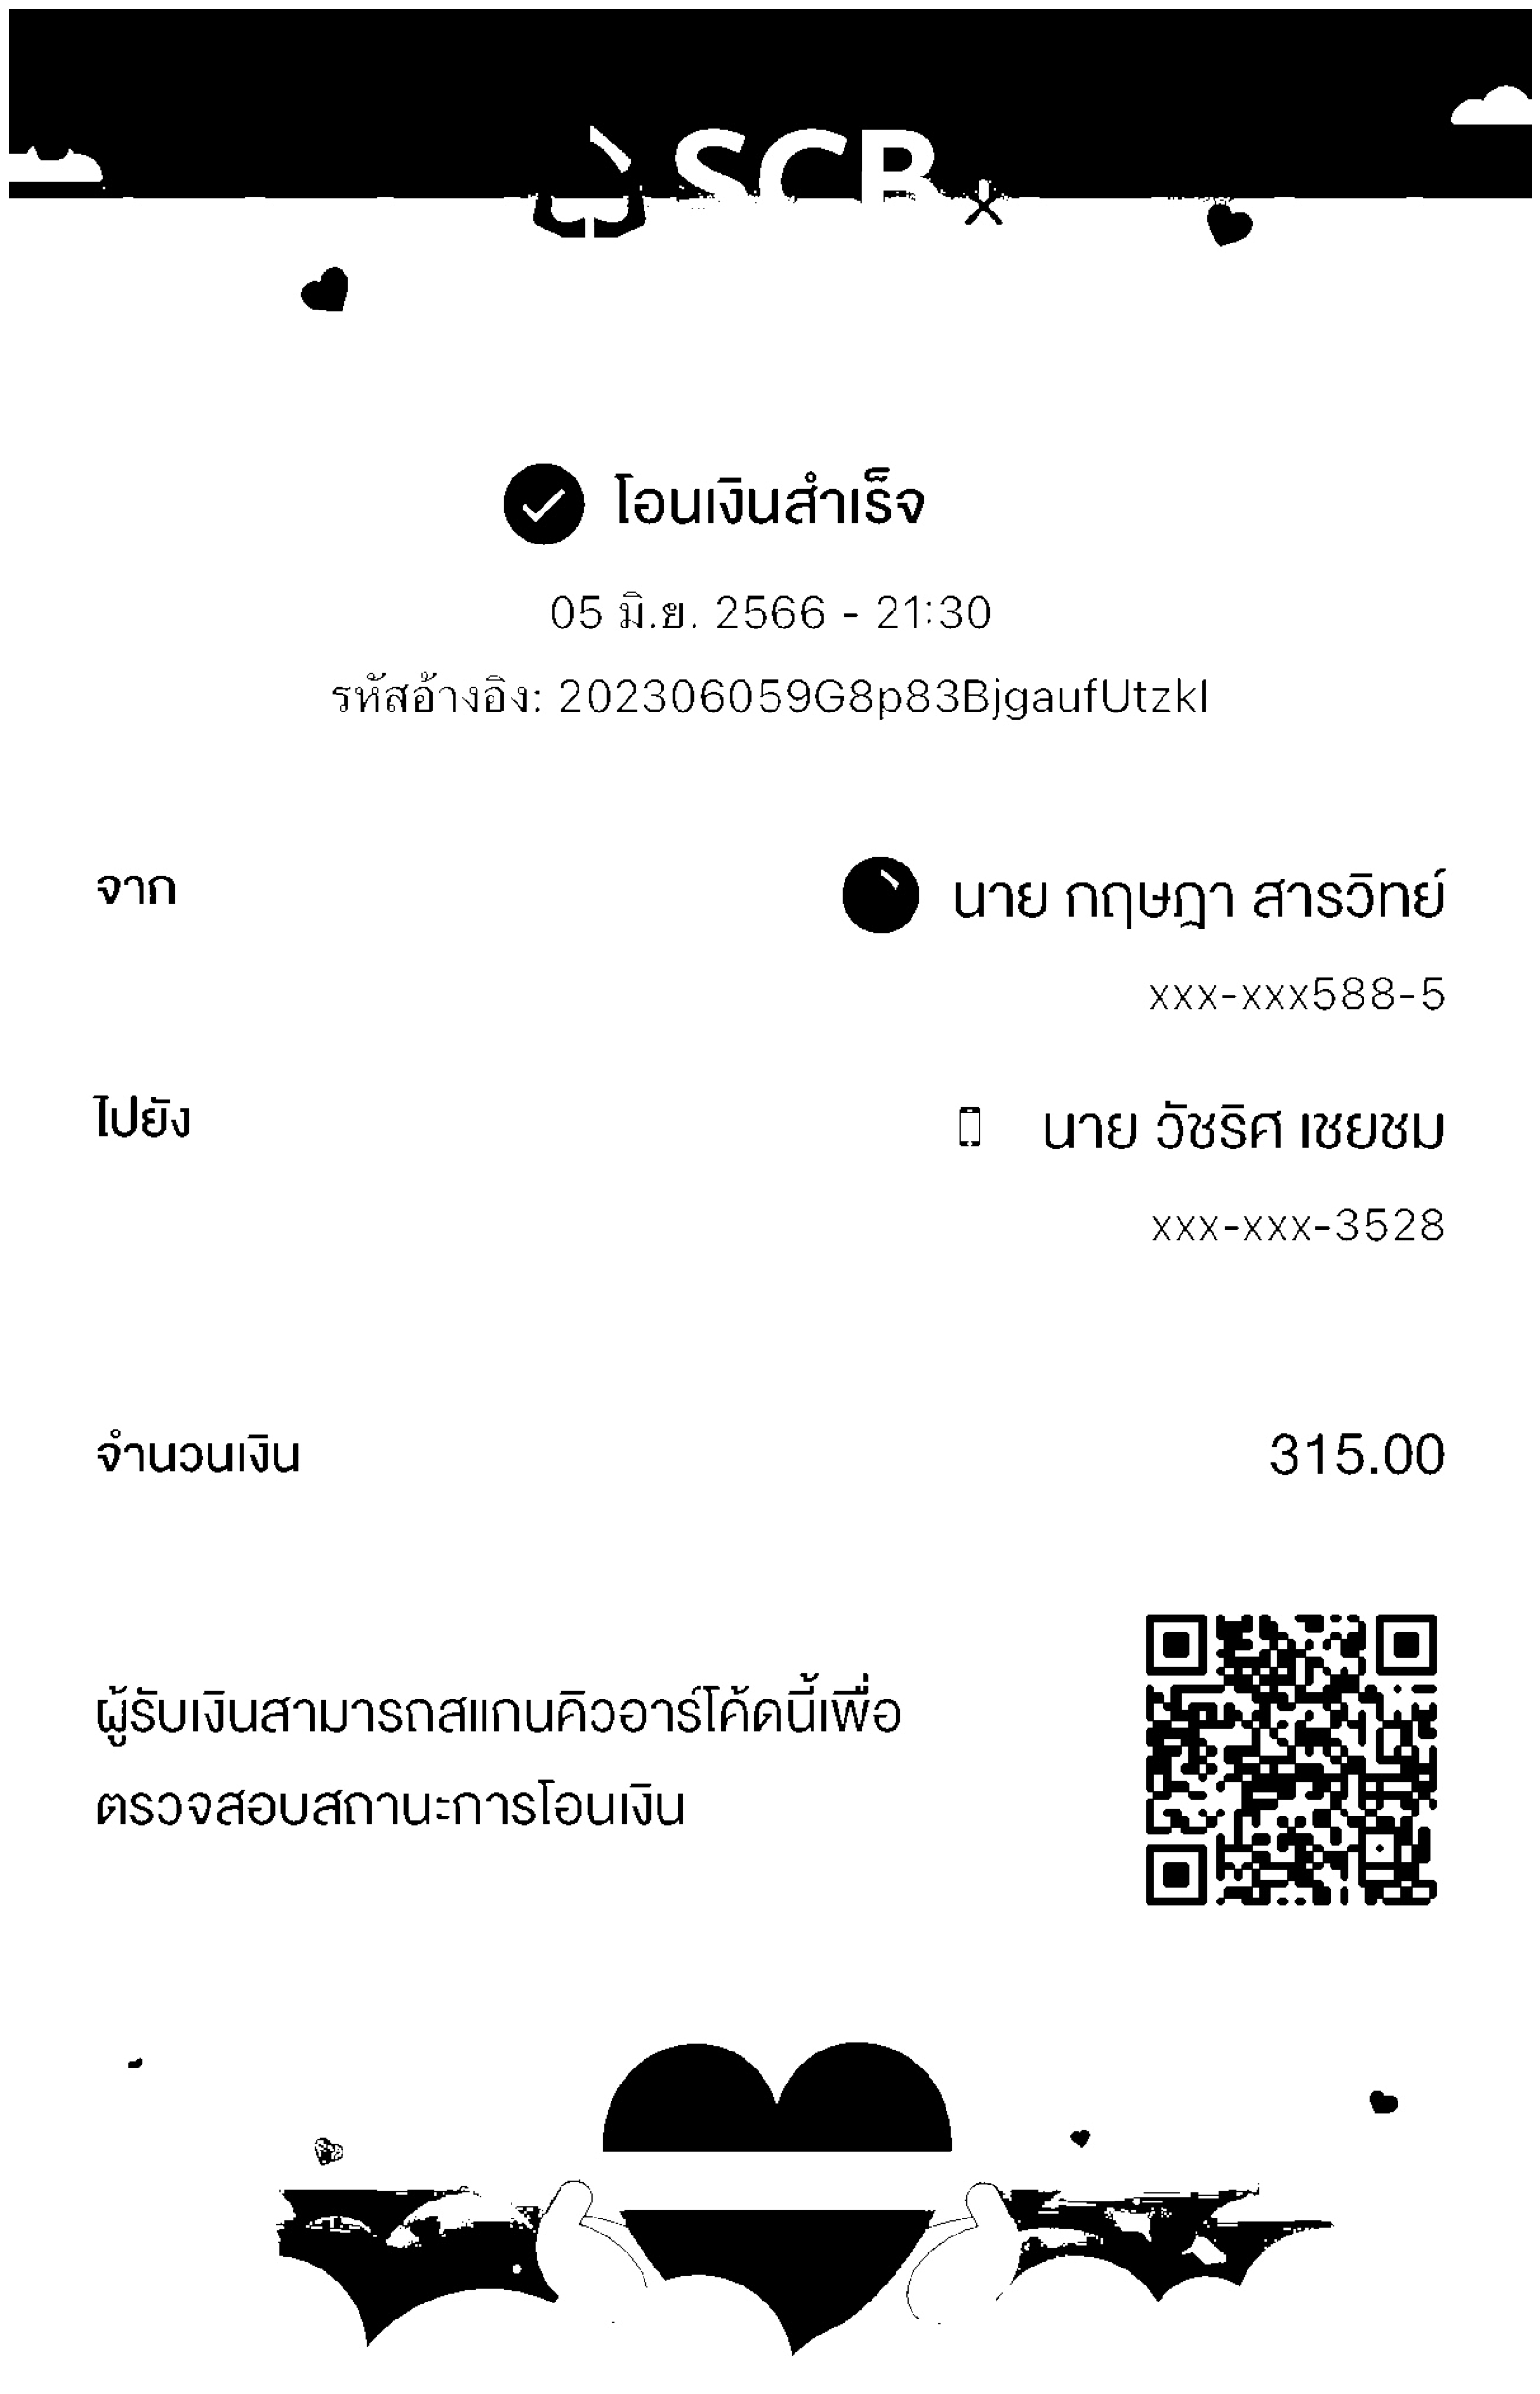

In [39]:
display("temp/eroded_image.jpg")

In [40]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [41]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp/dilated_image.jpg", dilated_image)

True

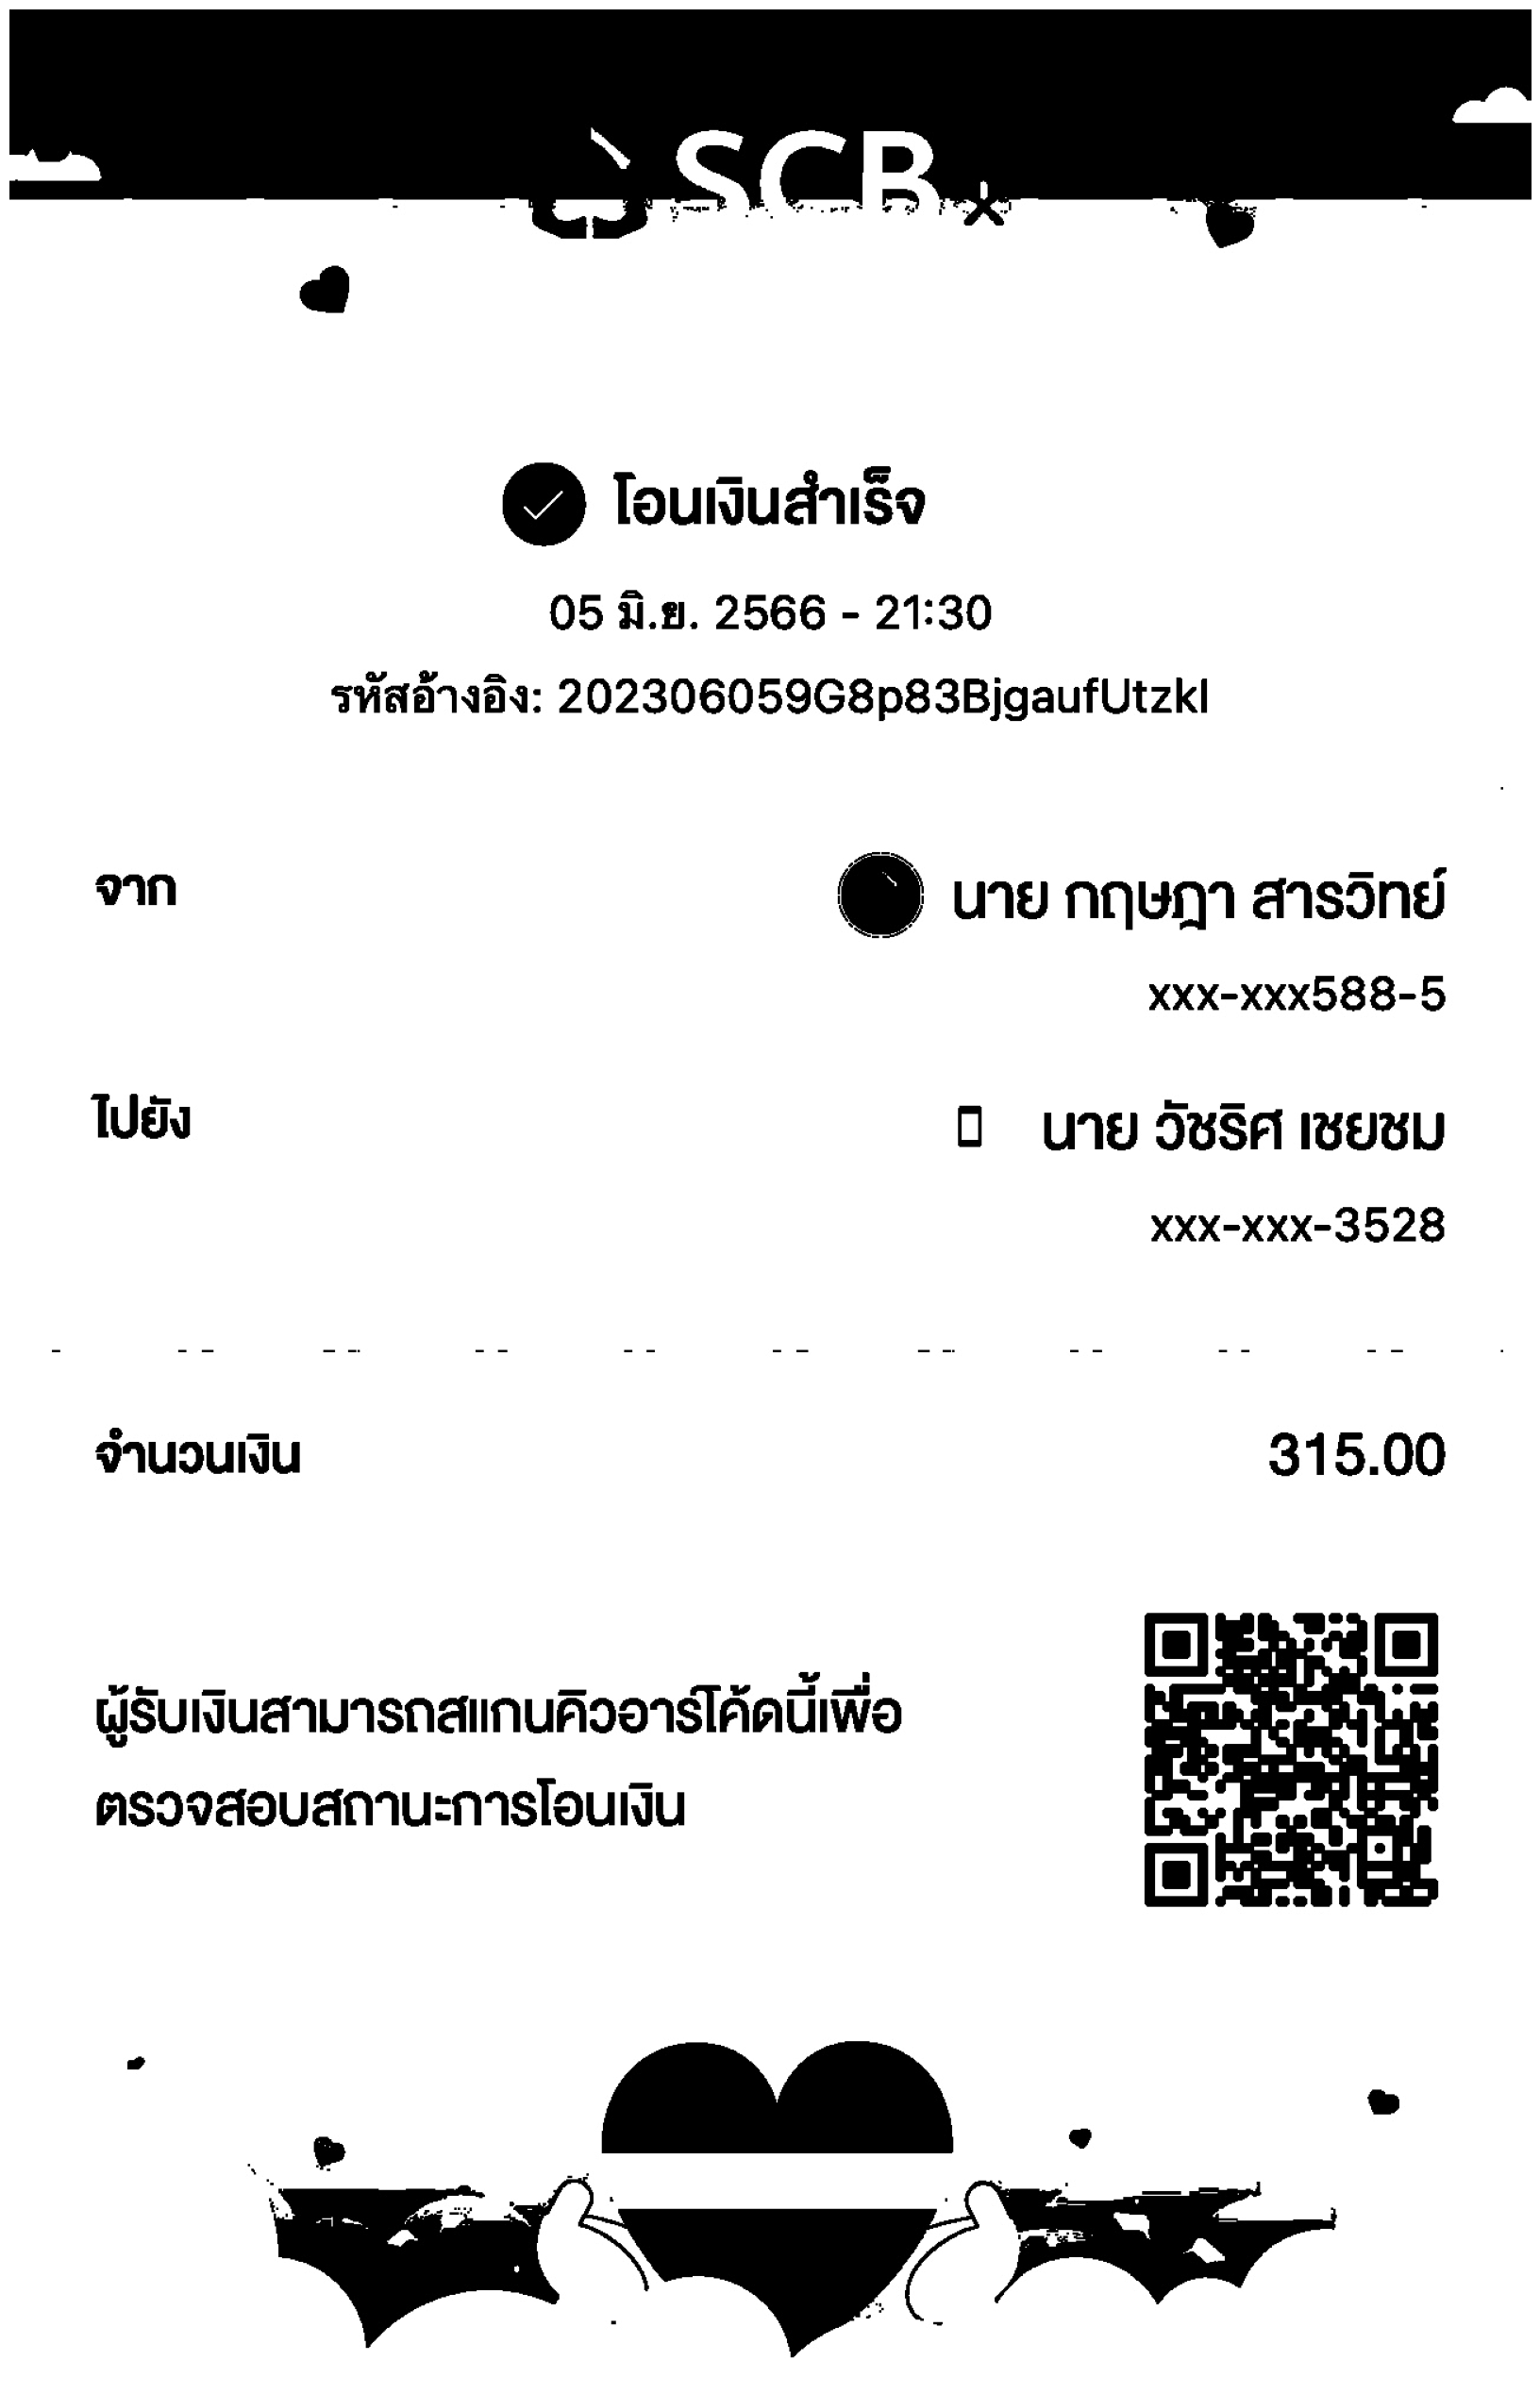

In [42]:
display("temp/dilated_image.jpg")

## 06: Rotation / Deskewing

## 07: Removing Borders

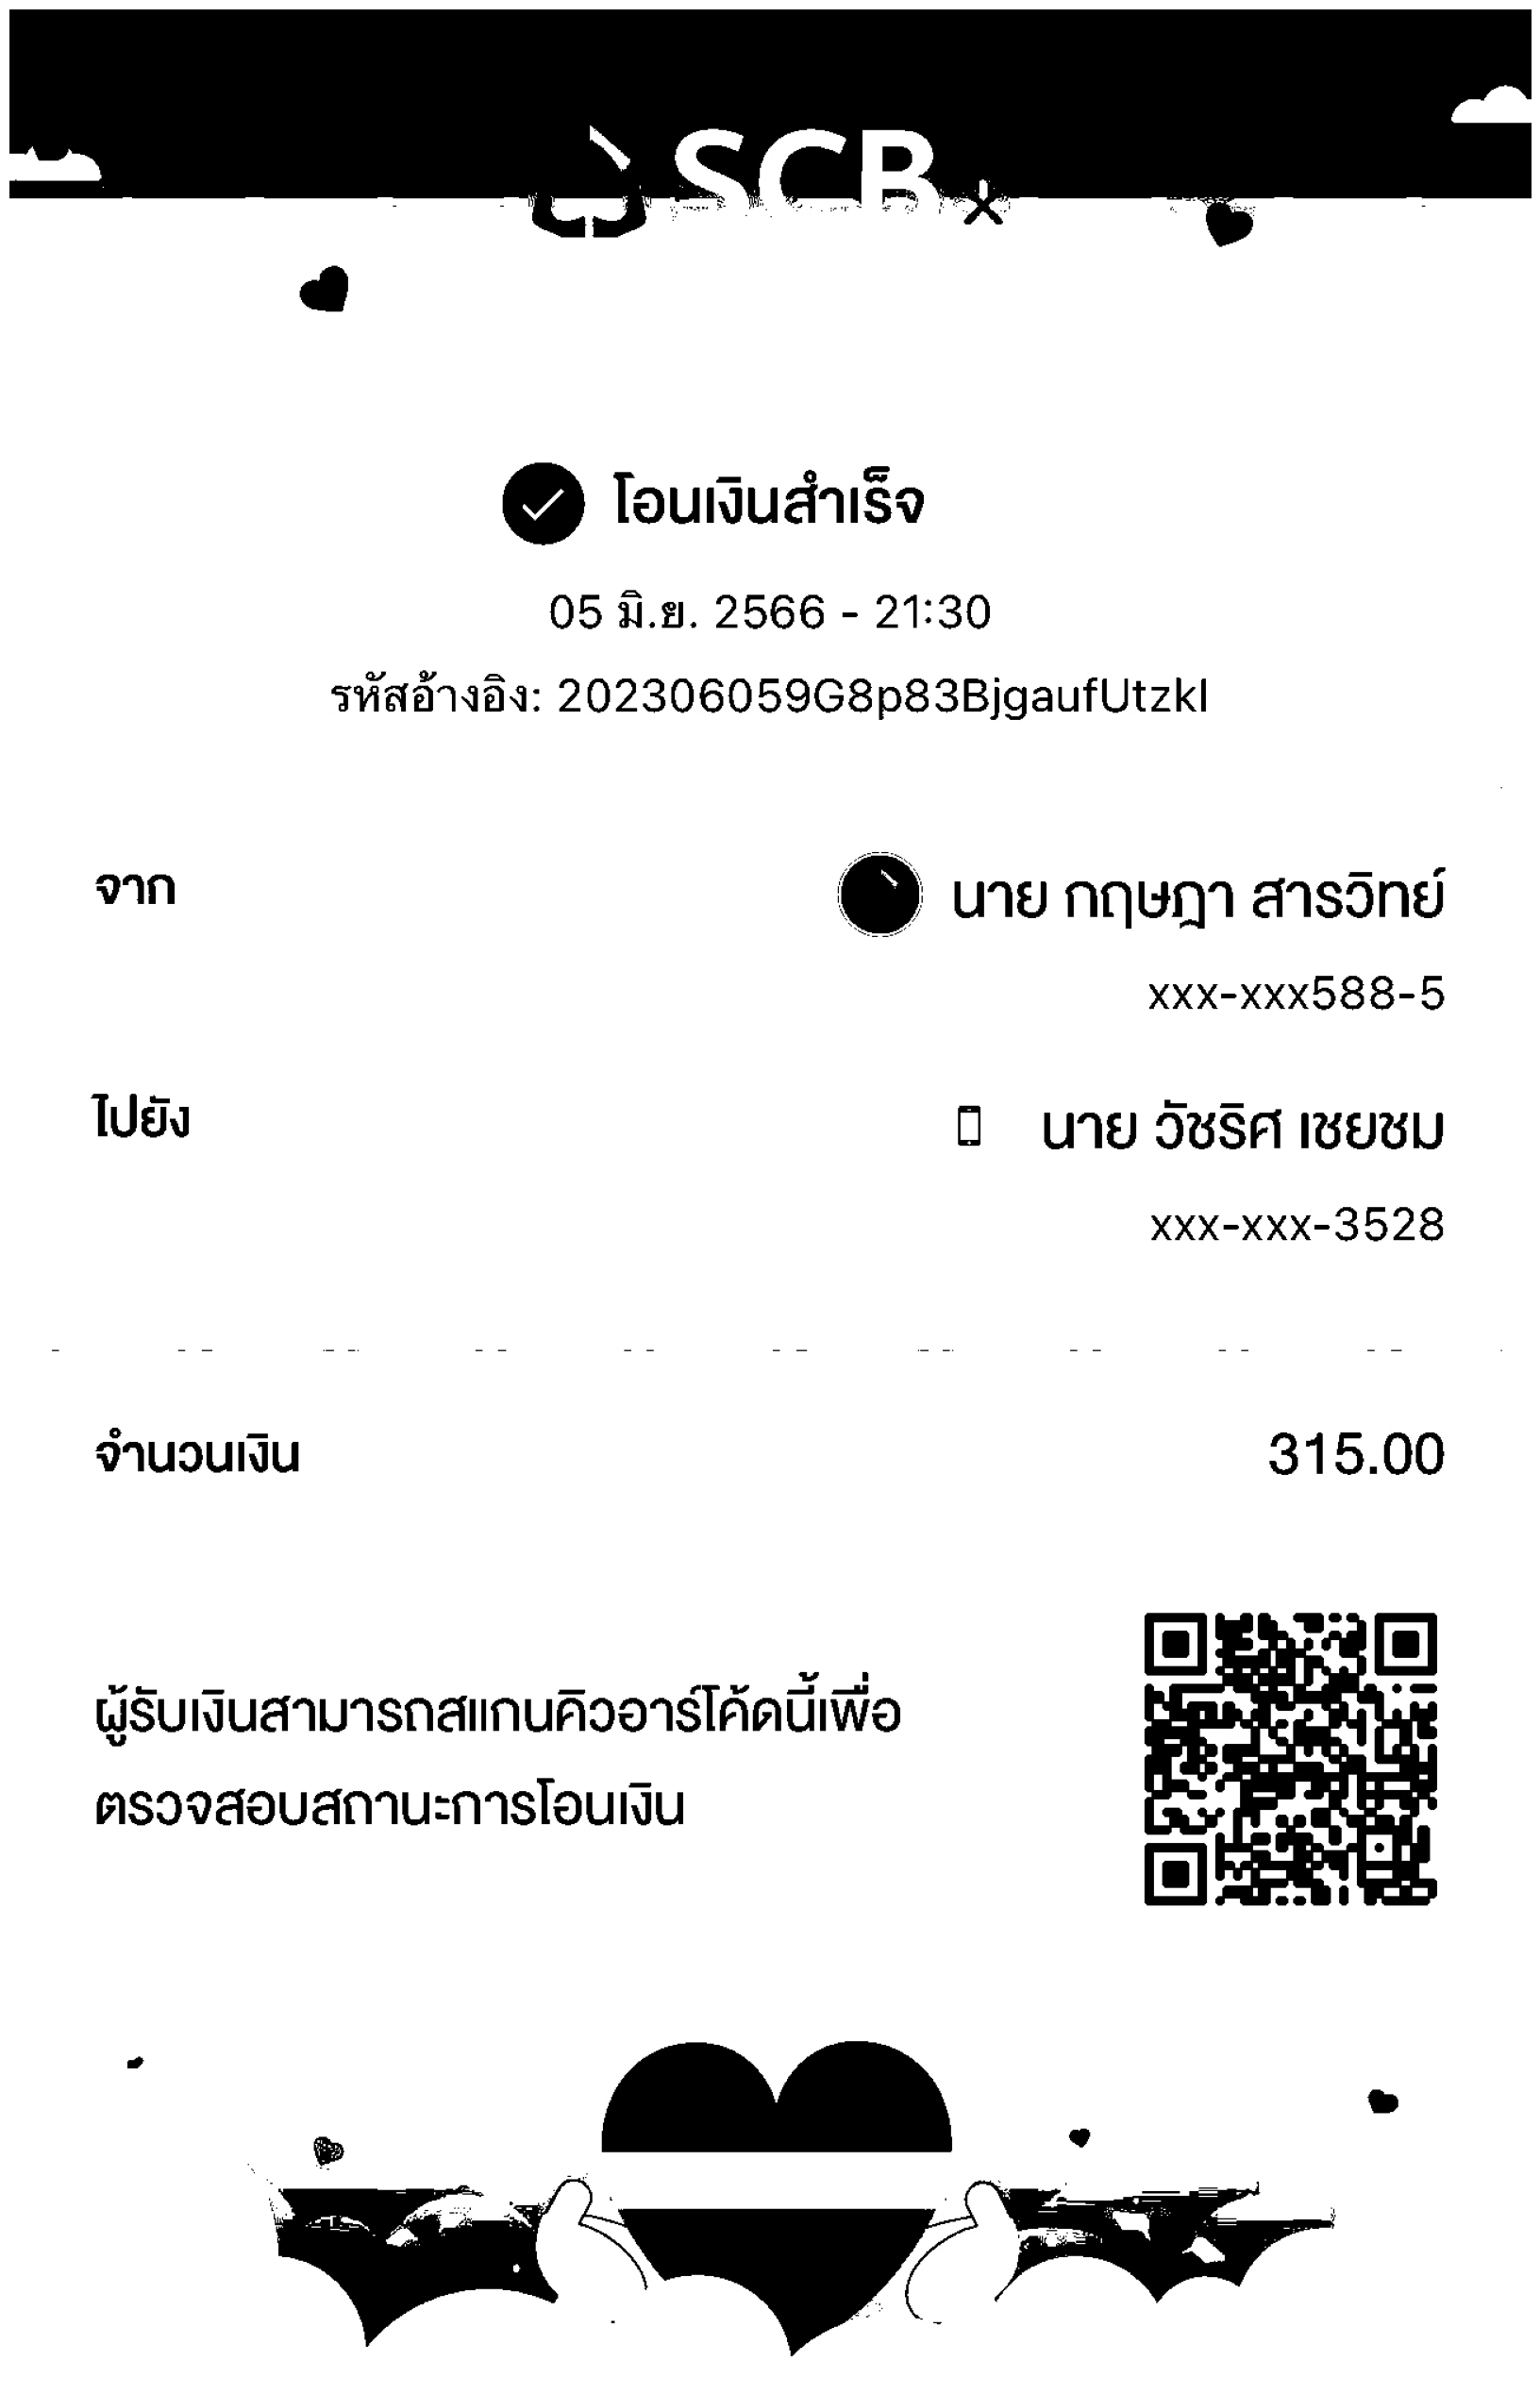

In [43]:
display("temp/no_noise.jpg")

In [44]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

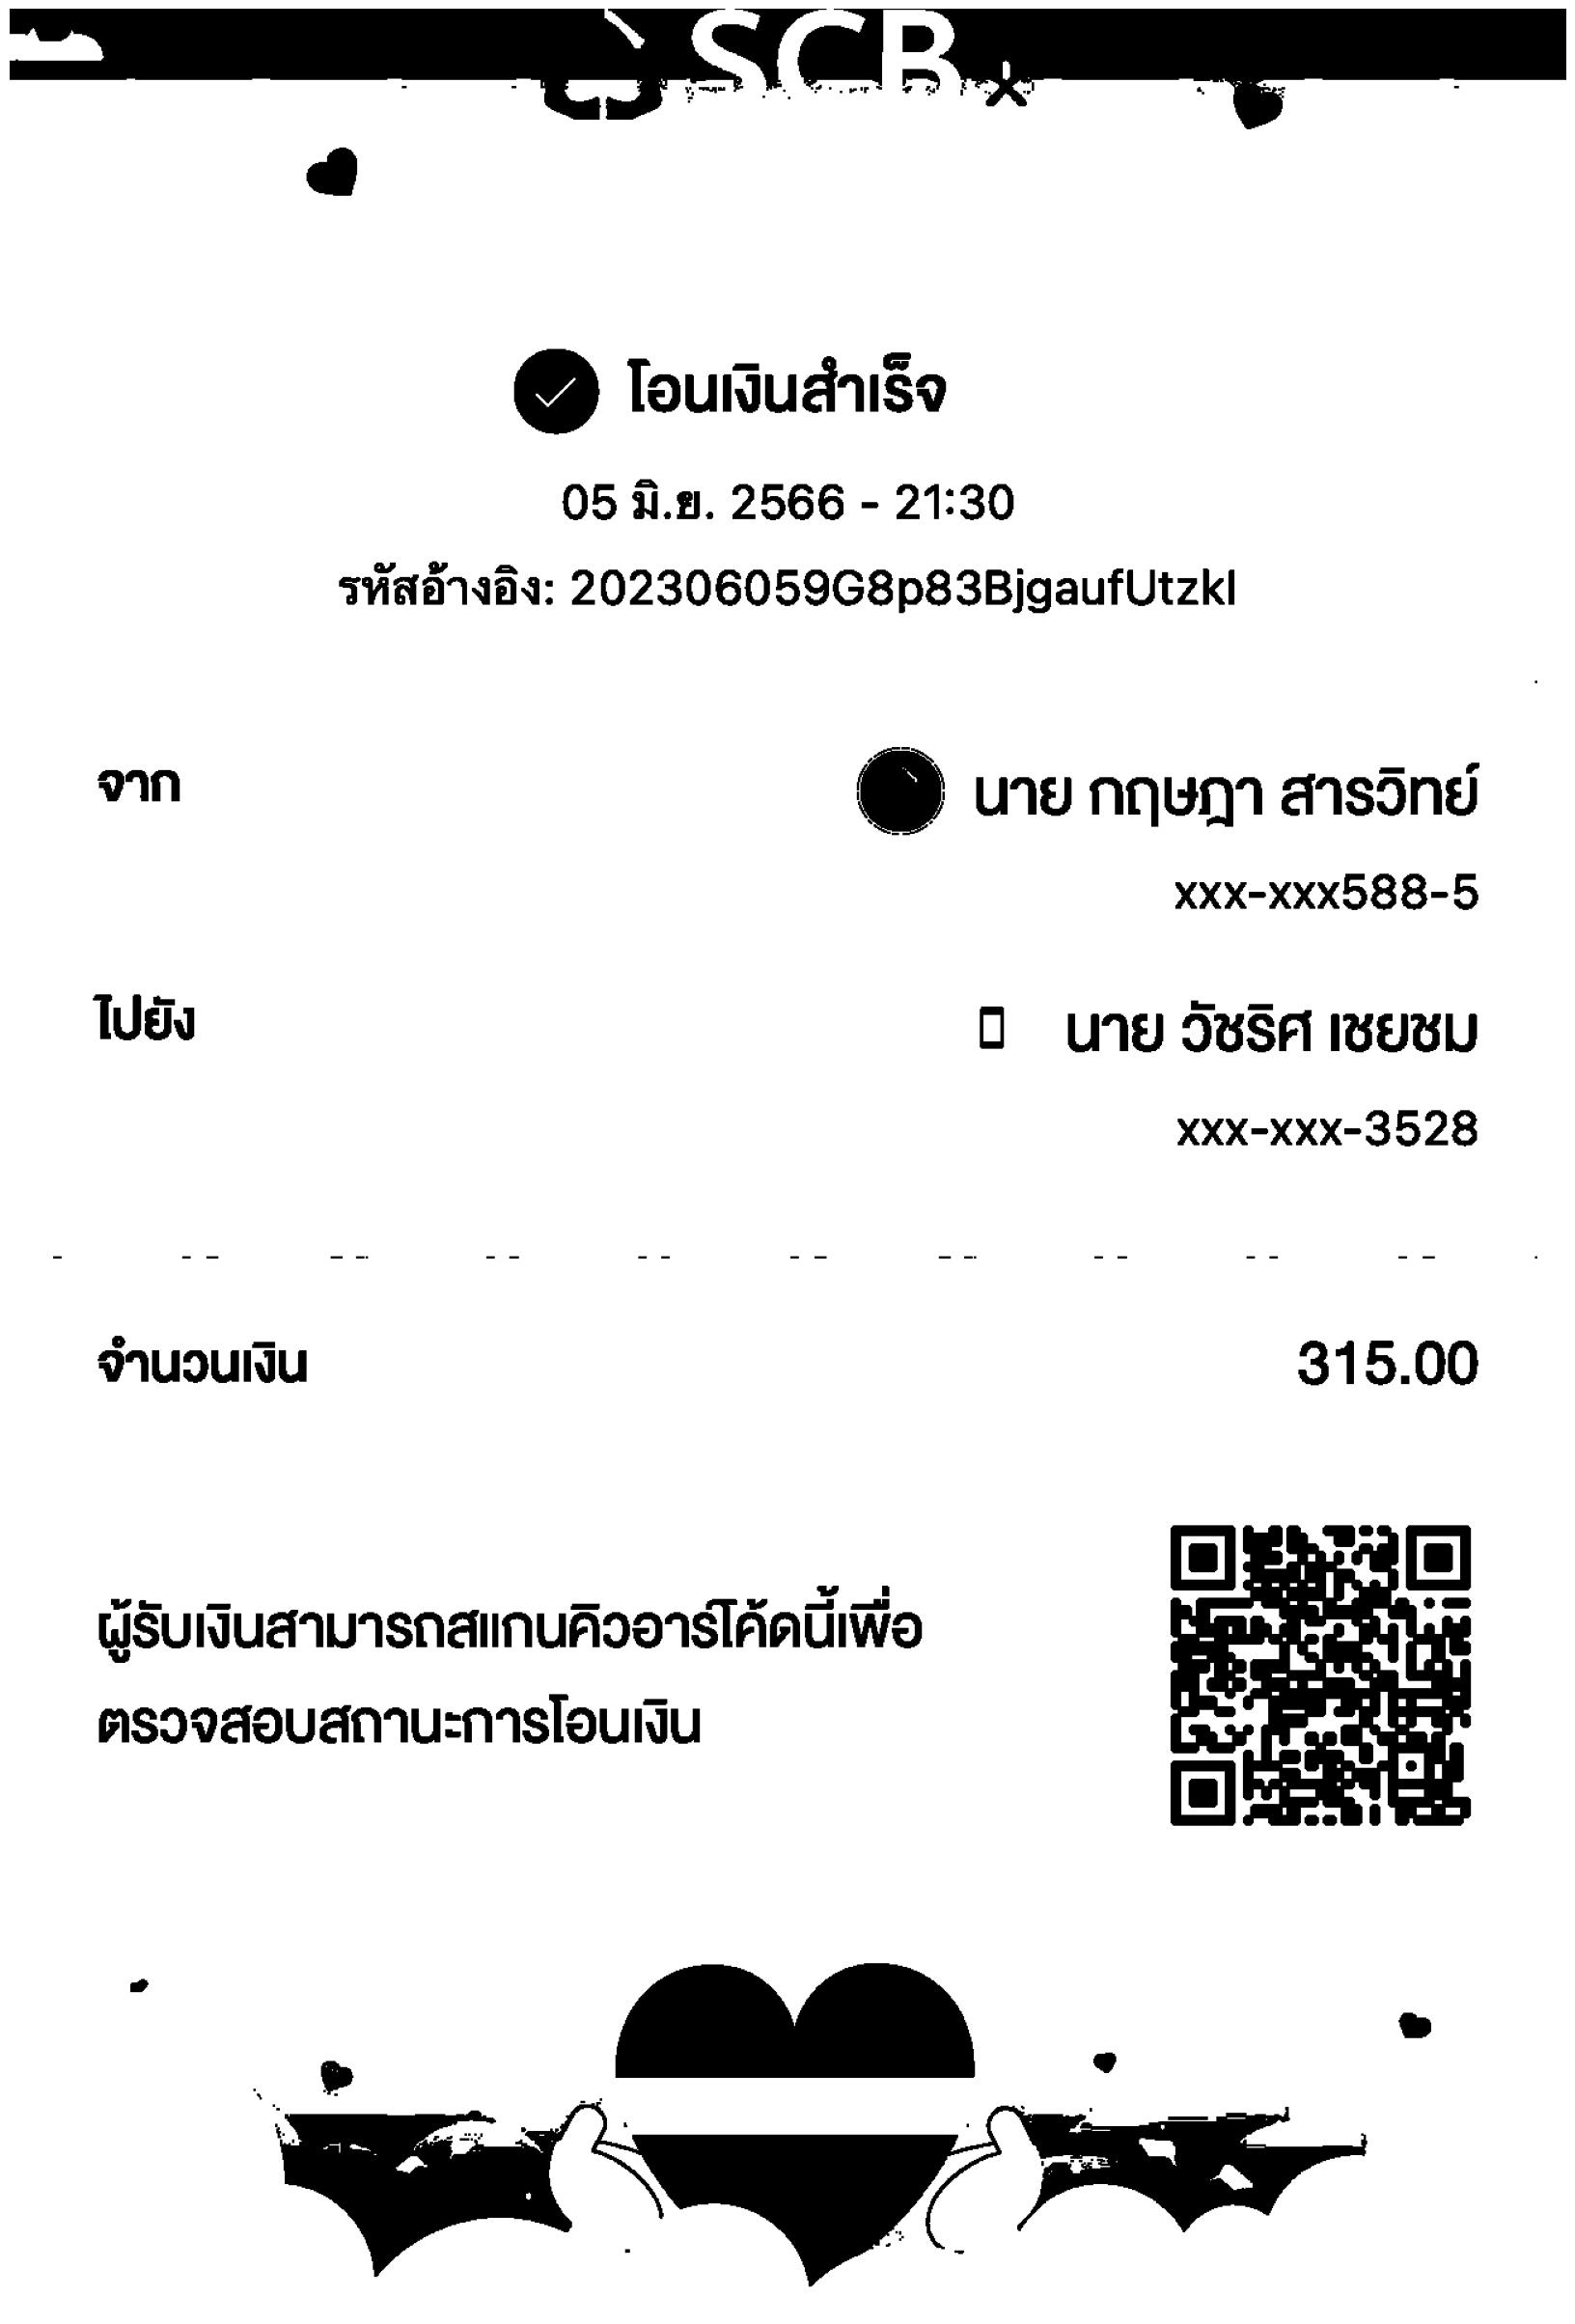

In [45]:
no_borders = remove_borders(dilated_image)
cv2.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

## 08: Missing Borders

In [46]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

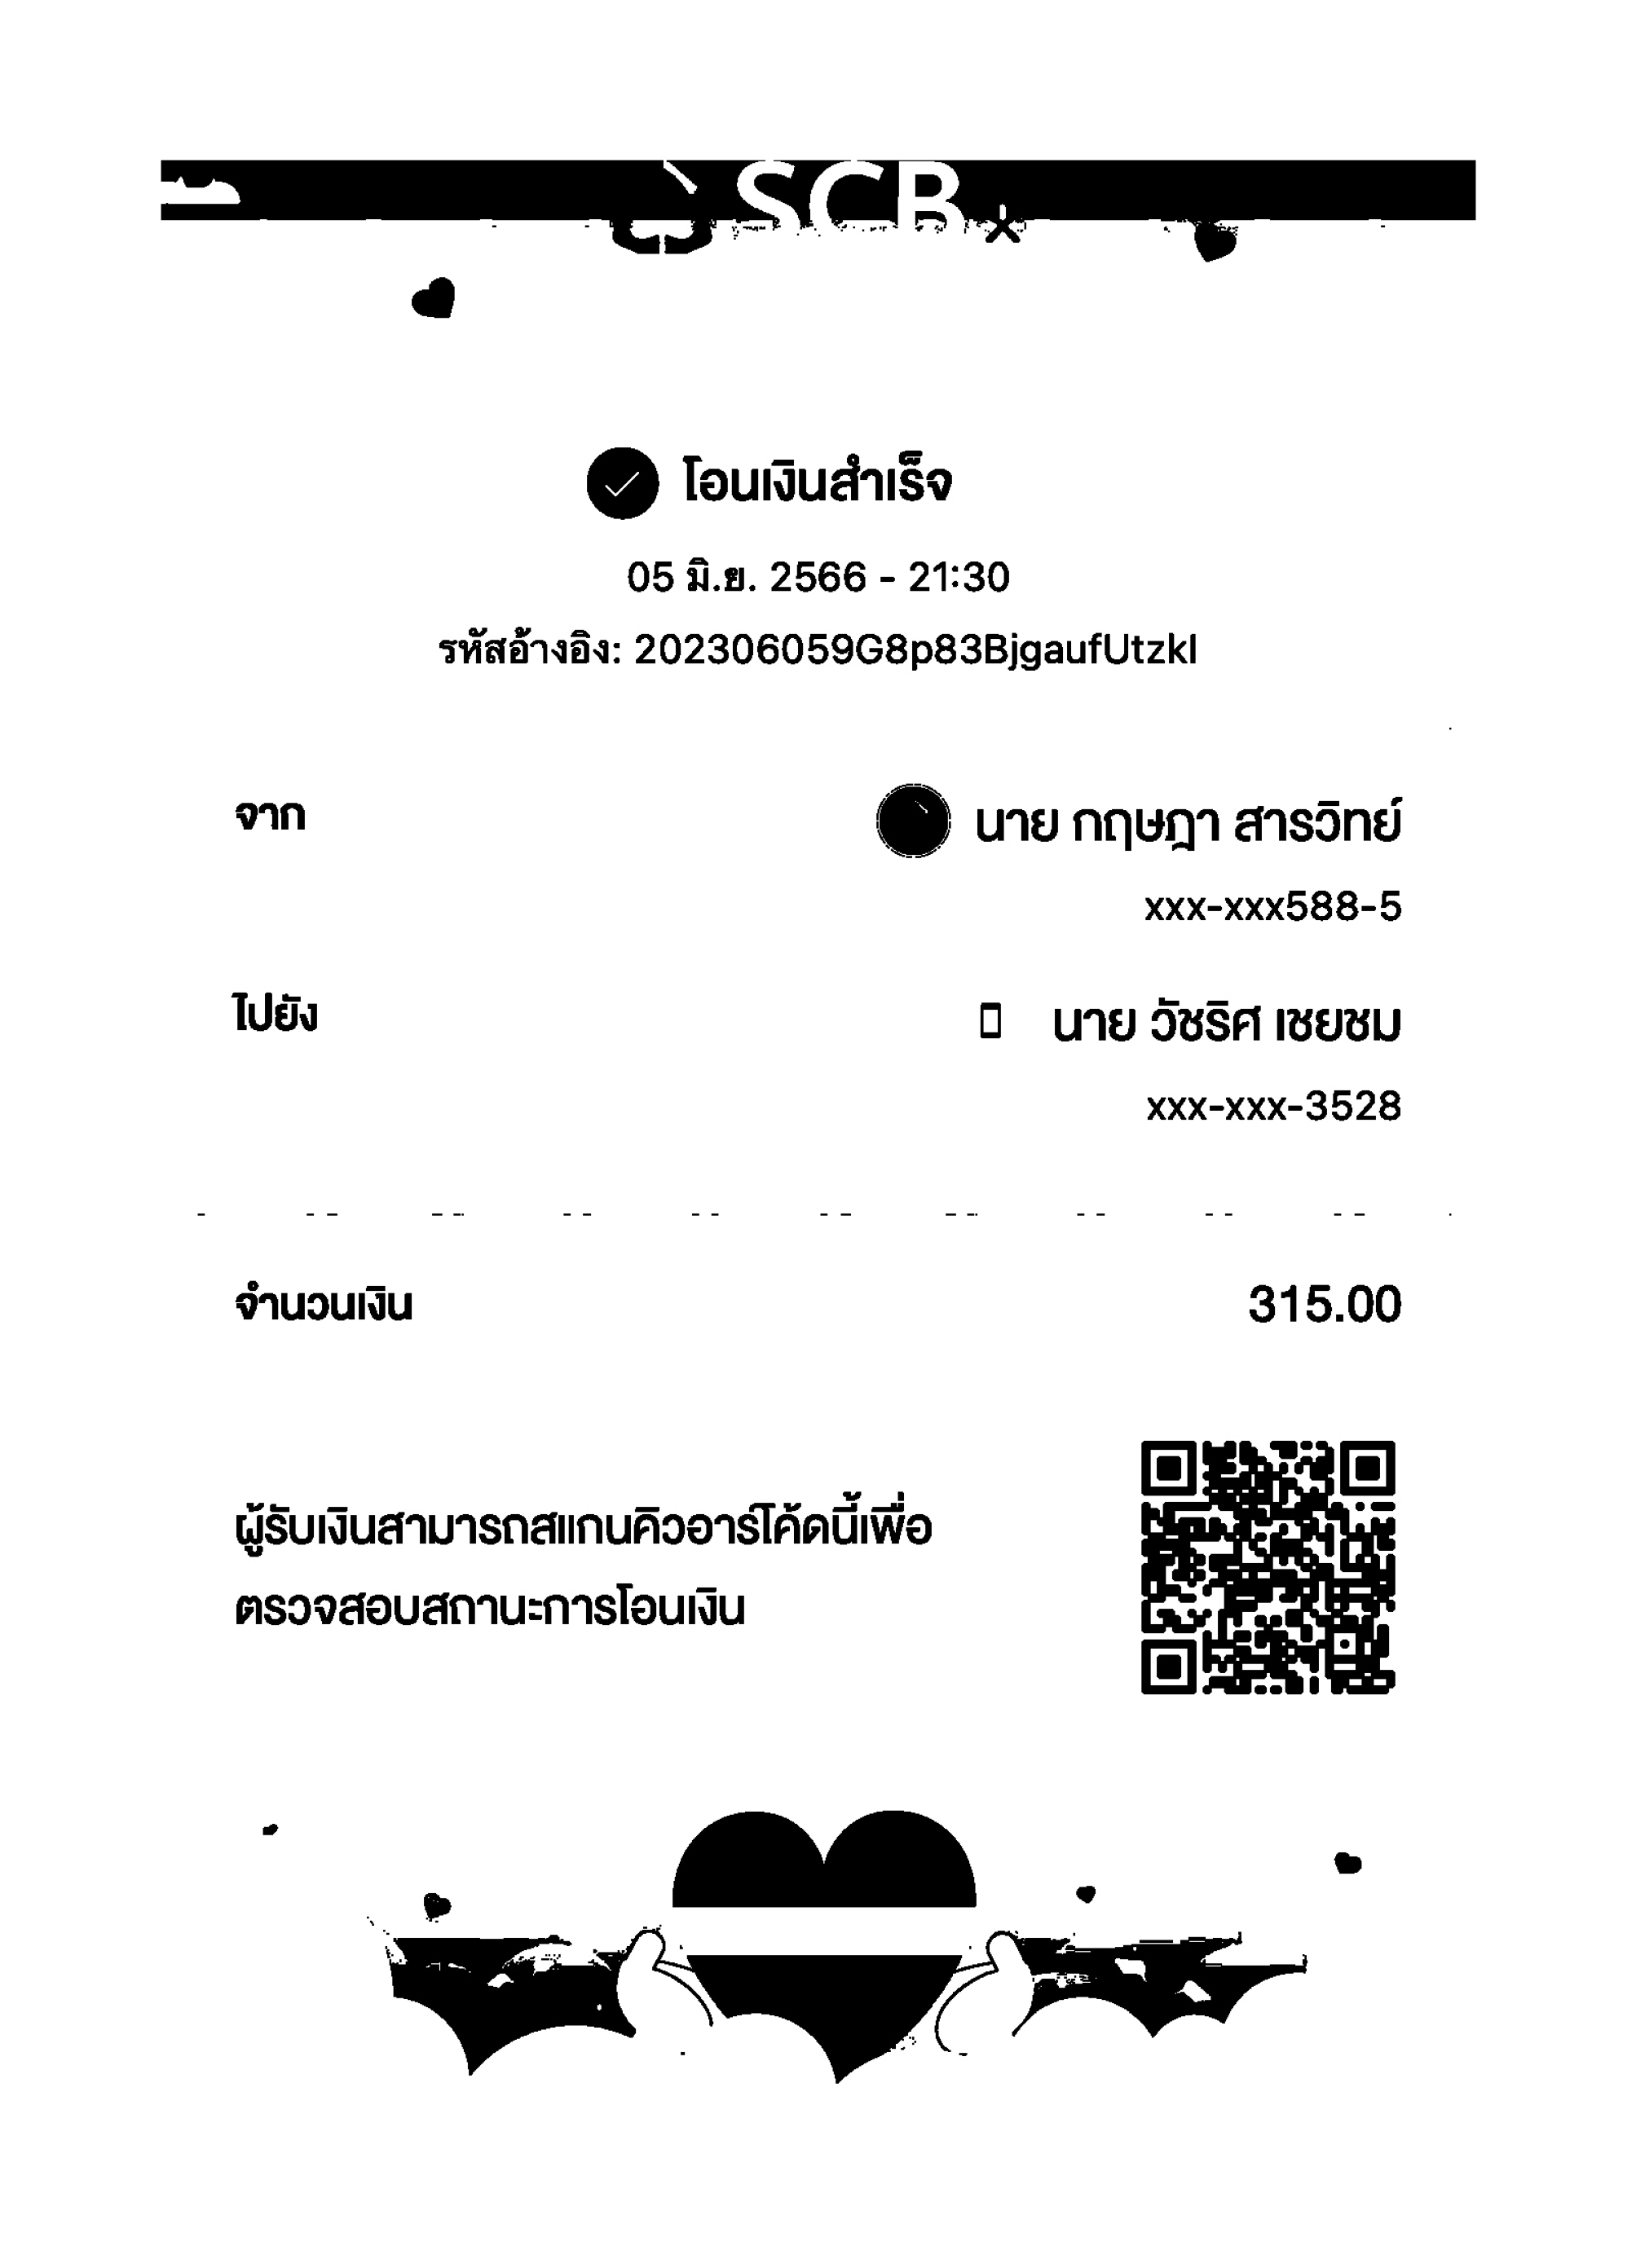

In [47]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)
display("temp/image_with_border.jpg")

In [48]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(image_file,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("Original Image")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Original Image
[[[438, 84], [804, 84], [804, 210], [438, 210]], 'cscb']
[[[501, 381], [789, 381], [789, 449], [501, 449]], 'โอนเงินสำเร็จ']
[[[450, 484], [838, 484], [838, 537], [450, 537]], '05 มิ.ย. 2566 21:30']
[[[262, 550], [1027, 550], [1027, 613], [262, 613]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[67, 723], [147, 723], [147, 767], [67, 767]], ' จาก']
[[[789, 716], [1231, 716], [1231, 857], [789, 857]], 'นาย กฤษฎา สารวิทย์  xxx-xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx-xxx-3528']
[[[64, 1196], [254, 1196], [254, 1250], [64, 1250]], ' จำนวนเงิน']
[[[1060, 1198], [1224, 1198], [1224, 1252], [1060, 1252]], '315.00']
[[[61, 1398], [770, 1398], [770, 1549], [61, 1549]], 'ผู้รับเงินสามารกสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [49]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(inverted_image,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("Inverted image")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Inverted image
[[[440, 84], [804, 84], [804, 212], [440, 212]], 'ascb']
[[[501, 383], [787, 383], [787, 449], [501, 449]], 'โอนเงินสำเร็จ']
[[[448, 484], [838, 484], [838, 537], [448, 537]], '05 มิ.ย. 2566 21:30']
[[[262, 550], [1026, 550], [1026, 614], [262, 614]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[68, 726], [146, 726], [146, 766], [68, 766]], ' จาก']
[[[789, 717], [1231, 717], [1231, 857], [789, 857]], 'นาย กฤษฎา สารวิทย์ xxx-xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx-xxx-3528']
[[[63, 1195], [253, 1195], [253, 1249], [63, 1249]], 'จำนวนเงิน']
[[[1060, 1198], [1224, 1198], [1224, 1252], [1060, 1252]], '315.00']
[[[59, 1398], [770, 1398], [770, 1549], [59, 1549]], 'ผู้รับพินสามารกสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [50]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(gray_image,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("gray_image")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


gray_image
[[[434, 84], [806, 84], [806, 210], [434, 210]], 'cscb']
[[[502, 378], [790, 378], [790, 450], [502, 450]], 'โอนเงินสำเร็จ']
[[[451, 487], [838, 487], [838, 536], [451, 536]], '05 มิ.ย. 2566 21:30']
[[[262, 550], [1027, 550], [1027, 613], [262, 613]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[67, 723], [147, 723], [147, 767], [67, 767]], ' จาก']
[[[790, 718], [1230, 718], [1230, 857], [790, 857]], 'นาย กฤษฎา สารวิทย์  xxx-xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx-xxx-3528']
[[[64, 1196], [254, 1196], [254, 1250], [64, 1250]], ' จำนวนเงิน']
[[[1060, 1198], [1224, 1198], [1224, 1252], [1060, 1252]], '315.00']
[[[61, 1398], [770, 1398], [770, 1549], [61, 1549]], 'ผู้รับเงินสามารกสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [51]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(otsu,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("otsu")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


otsu
[[[438, 78], [802, 78], [802, 204], [438, 204]], 's63']
[[[448, 378], [839, 378], [839, 537], [448, 537]], 'โอนเงินสำเร็จ 05 มิ.ย. 2566 21:30']
[[[262, 549], [1027, 549], [1027, 613], [262, 613]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[70, 728], [146, 728], [146, 766], [70, 766]], 'จาก']
[[[789, 715], [1232, 715], [1232, 857], [789, 857]], 'นาย กฤษฎา สารวิทย์  xxx xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx-xxx-3528']
[[[62, 1192], [257, 1192], [257, 1255], [62, 1255]], ' จำนวนเงิน']
[[[1060, 1198], [1226, 1198], [1226, 1254], [1060, 1254]], '315.00']
[[[61, 1398], [770, 1398], [770, 1549], [61, 1549]], 'ผู้รับเงินสามารถสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [52]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(no_noise,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("no_noise")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


no_noise
[[[438, 78], [802, 78], [802, 204], [438, 204]], 's63']
[[[448, 378], [839, 378], [839, 537], [448, 537]], 'โอนเงินสำเร็จ 05 มิ.ย. 2566 21:30']
[[[262, 549], [1027, 549], [1027, 613], [262, 613]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[70, 728], [146, 728], [146, 766], [70, 766]], 'จาก']
[[[789, 715], [1232, 715], [1232, 857], [789, 857]], 'นาย กฤษฎา สารวิทย์  xxx xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx-xxx-3528']
[[[62, 1192], [257, 1192], [257, 1255], [62, 1255]], ' จำนวนเงิน']
[[[1060, 1198], [1226, 1198], [1226, 1254], [1060, 1254]], '315.00']
[[[61, 1398], [770, 1398], [770, 1549], [61, 1549]], 'ผู้รับเงินสามารถสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [53]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(eroded_image,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("thin_font")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


thin_font
[[[463, 81], [801, 81], [801, 195], [463, 195]], 'st3']
[[[503, 381], [787, 381], [787, 449], [503, 449]], 'โอนเงินสำเร็จ']
[[[451, 487], [838, 487], [838, 536], [451, 536]], '05 มิ.ย. 2566 21:30']
[[[263, 553], [1026, 553], [1026, 612], [263, 612]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[70, 728], [146, 728], [146, 766], [70, 766]], ' จาก']
[[[790, 720], [1230, 720], [1230, 857], [790, 857]], 'นาย กฤษฎา สารวิทย์  xxx xxx588-5']
[[[65, 915], [161, 915], [161, 965], [65, 965]], 'ไปยัง']
[[[867, 917], [1225, 917], [1225, 1053], [867, 1053]], 'นาย วัชริศเชยชม  xxx xxx-3528']
[[[63, 1195], [255, 1195], [255, 1254], [63, 1254]], ' จำนวนเงิน']
[[[1059, 1197], [1223, 1197], [1223, 1251], [1059, 1251]], '315.00']
[[[61, 1398], [770, 1398], [770, 1549], [61, 1549]], 'ผู้รับเงินสามารกสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [54]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(dilated_image,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("dilated_image")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


dilated_image
[[[448, 80], [802, 80], [802, 206], [448, 206]], 'ss03']
[[[451, 379], [841, 379], [841, 535], [451, 535]], 'โอนเงินสำเร็จ 05 มิ.ย. 2566 21:30']
[[[263, 553], [1027, 553], [1027, 615], [263, 615]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[70, 728], [146, 728], [146, 766], [70, 766]], 'จาก']
[[[789, 717], [1231, 717], [1231, 859], [789, 859]], 'นาย กฤษฎา สาธวิทย์  xxx-xxx588-5']
[[[61, 912], [163, 912], [163, 966], [61, 966]], 'ไปยัง']
[[[867, 917], [1228, 917], [1228, 1065], [867, 1065]], 'นาย วัชริศเชยชม xxx-xxx-3528']
[[[62, 1192], [257, 1192], [257, 1254], [62, 1254]], ' จำนอนเงิน']
[[[1060, 1198], [1228, 1198], [1228, 1256], [1060, 1256]], '315.00']
[[[61, 1398], [772, 1398], [772, 1554], [61, 1554]], 'ผู้รับเงินสามารกสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


In [55]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(no_borders,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
print("no_borders")
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


no_borders
[[[478, 0], [800, 0], [800, 98], [478, 98]], '3sบ3']
[[[450, 273], [841, 273], [841, 435], [450, 435]], 'โอนเงินสำเร็จ 05 มิ.ย. 2566 21:30']
[[[263, 449], [1027, 449], [1027, 513], [263, 513]], ' รหัสอ้างอิง: 20230605968p83bjgaufutzk/']
[[[70, 624], [146, 624], [146, 664], [70, 664]], 'จาก']
[[[790, 615], [1230, 615], [1230, 755], [790, 755]], 'นาย กฤษฎา สาธวิทย์  xxx-xxx588-5']
[[[62, 810], [164, 810], [164, 864], [62, 864]], 'โปยัง']
[[[867, 813], [1227, 813], [1227, 951], [867, 951]], 'นาย วัชริศเชยชม  xxx xxx-3528']
[[[62, 1090], [257, 1090], [257, 1153], [62, 1153]], ' จำนวนเงิน']
[[[1060, 1094], [1228, 1094], [1228, 1152], [1060, 1152]], '315.00']
[[[61, 1294], [772, 1294], [772, 1447], [61, 1447]], 'ผู้รับเงินสามารถสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการโอนเงิน']


## 09: Transparency / Alpha Channel